# Credit Scorecard Model Using Logistic Regression (Study Case: Home Credit)

# Business Understanding

Founded in 1997, Home Credit is an international consumer finance provider with operations in eight countries. Home Credit focus on responsible lending model empowers underserved customers with little or no credit history to access financing, enabling customers to borrow easily and safely, both online and offline. Home Credit finances both the purchase of consumer goods through a cash-less loan transaction or other commodities, such as language courses, travel etc. through a cash loans.

## Problem Statement

An important fraction of the population finds it difficult to get their loans approved due to insufficient or absent credit history. Conversely, it is a major challenge for banks and other finance lending agencies to decide for which candidates to approve loans. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data to predict their clients' repayment abilities.

## Business Objectives

Create a credit scoring system where the inputs are various features describing the financial and behavioral history of the loan applicants, in order to automatically predict whether the loan will be repaid or defaulted.

# Import Libraries

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-plot
import scikitplot as skplt

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator 
from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer

# Statistical test
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import roc_auc_score

#Cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# Model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 150)

# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Overview

## Import Dataset

In [ ]:
# Application Dataset
app_train = pd.read_csv('/content/drive/MyDrive/Home Credit - VIX Rakamin Academy/application_train.csv')
app_test = pd.read_csv('/content/drive/MyDrive/Home Credit - VIX Rakamin Academy/application_test.csv')

In [ ]:
print('This dataset has %d rows dan %d columns.\n' % app_train.shape)
app_train.head()

This dataset has 307511 rows dan 122 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Feature Description

| Features | Description |
| :--- | :--- |
| SK_ID_CURR	| ID of loan in our sample |
| TARGET	| Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases) |
| NAME_CONTRACT_TYPE |	Identification if loan is cash or revolving |
| CODE_GENDER	| Gender of the client |
| FLAG_OWN_CAR	| Flag if the client owns a car |
| FLAG_OWN_REALTY |	Flag if client owns a house or flat |
| CNT_CHILDREN |	Number of children the client has |
| AMT_INCOME_TOTAL	|  Income of the client |
| AMT_CREDIT |	Credit amount of the loan |
| AMT_ANNUITY |	Loan annuity |
| AMT_GOODS_PRICE	| For consumer loans it is the price of the goods for which the loan is given |
| NAME_TYPE_SUITE	| Who was accompanying client when he was applying for the loan |
| NAME_INCOME_TYPE	| Clients income type (businessman, working, maternity leave, etc…) |
| NAME_EDUCATION_TYPE |	Level of highest education the client achieved |
| NAME_FAMILY_STATUS |	Family status of the client |
| NAME_HOUSING_TYPE	| What is the housing situation of the client (renting, living with parents, etc...) |
| REGION_POPULATION_RELATIVE	| Normalized population of region where client lives (higher number means the client lives in more populated region) |
| DAYS_BIRTH	| Client's age in days at the time of application |
| DAYS_EMPLOYED	| How many days before the application the person started current employment |
| DAYS_REGISTRATION |	How many days before the application did client change his registration |
| DAYS_ID_PUBLISH |	How many days before the application did client change the identity document with which he applied for the loan |
| OWN_CAR_AGE |	Age of client's car |
| FLAG_MOBIL |	Did client provide mobile phone (1=YES, 0=NO) |
| FLAG_EMP_PHONE |	Did client provide work phone (1=YES, 0=NO) |
| FLAG_WORK_PHONE |	Did client provide home phone (1=YES, 0=NO) |
| FLAG_CONT_MOBILE |	Was mobile phone reachable (1=YES, 0=NO) |
| FLAG_PHONE |	Did client provide home phone (1=YES, 0=NO) |
| FLAG_EMAIL |	Did client provide email (1=YES, 0=NO) |
| OCCUPATION_TYPE |	What kind of occupation does the client have |
| CNT_FAM_MEMBERS |	How many family members does client have |
| REGION_RATING_CLIENT |	Our rating of the region where client lives (1,2,3) |
| REGION_RATING_CLIENT_W_CITY	| Our rating of the region where client lives with taking city into account (1,2,3) |
| WEEKDAY_APPR_PROCESS_START | On which day of the week did the client apply for the loan |
| HOUR_APPR_PROCESS_START	| Approximately at what hour did the client apply for the loan |
| REG_REGION_NOT_LIVE_REGION	| Flag if client's permanent address does not match contact address (1=different, 0=same, at region level) |
| REG_REGION_NOT_WORK_REGION |	Flag if client's permanent address does not match work address (1=different, 0=same, at region level) |
| LIVE_REGION_NOT_WORK_REGION |	Flag if client's contact address does not match work address (1=different, 0=same, at region level) |
| REG_CITY_NOT_LIVE_CITY |	Flag if client's permanent address does not match contact address (1=different, 0=same, at city level) |
| REG_CITY_NOT_WORK_CITY |	Flag if client's permanent address does not match work address (1=different, 0=same, at city level) |
| LIVE_CITY_NOT_WORK_CITY |	Flag if client's contact address does not match work address (1=different, 0=same, at city level) |
| ORGANIZATION_TYPE |	Type of organization where client works |
| EXT_SOURCE_1 |	Normalized score from external data source |
| EXT_SOURCE_2 |	Normalized score from external data source |
| EXT_SOURCE_3 |	Normalized score from external data source |
| APARTMENTS_AVG |	Normalized information about building  where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| BASEMENTAREA_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| YEARS_BEGINEXPLUATATION_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| YEARS_BUILD_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| COMMONAREA_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| ELEVATORS_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| ENTRANCES_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| FLOORSMAX_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| FLOORSMIN_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| LANDAREA_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| LIVINGAPARTMENTS_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| LIVINGAREA_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| NONLIVINGAPARTMENTS_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| NONLIVINGAREA_AVG |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| APARTMENTS_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| BASEMENTAREA_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| YEARS_BEGINEXPLUATATION_MODE | Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| YEARS_BUILD_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| COMMONAREA_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| ELEVATORS_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| ENTRANCES_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| FLOORSMAX_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| FLOORSMIN_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| LANDAREA_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| LIVINGAPARTMENTS_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| LIVINGAREA_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| NONLIVINGAPARTMENTS_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| NONLIVINGAREA_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| APARTMENTS_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| BASEMENTAREA_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| YEARS_BEGINEXPLUATATION_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| YEARS_BUILD_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| COMMONAREA_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| ELEVATORS_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| ENTRANCES_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| FLOORSMAX_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| FLOORSMIN_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| LANDAREA_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| LIVINGAPARTMENTS_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| LIVINGAREA_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| NONLIVINGAPARTMENTS_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| NONLIVINGAREA_MEDI |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| FONDKAPREMONT_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| HOUSETYPE_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| TOTALAREA_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| WALLSMATERIAL_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| EMERGENCYSTATE_MODE |	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor |
| OBS_30_CNT_SOCIAL_CIRCLE |	How many observation of client's social surroundings with observable 30 DPD (days past due) default |
| DEF_30_CNT_SOCIAL_CIRCLE |	How many observation of client's social surroundings defaulted on 30 DPD (days past due) |
| OBS_60_CNT_SOCIAL_CIRCLE |	How many observation of client's social surroundings with observable 60 DPD (days past due) default |
| DEF_60_CNT_SOCIAL_CIRCLE |	How many observation of client's social surroundings defaulted on 60 (days past due) DPD |
| DAYS_LAST_PHONE_CHANGE |	How many days before application did client change phone |
| FLAG_DOCUMENT_2 |	Did client provide document 2 |
| FLAG_DOCUMENT_3 |	Did client provide document 3 |
| FLAG_DOCUMENT_4 |	Did client provide document 4 |
| FLAG_DOCUMENT_5 |	Did client provide document 5 |
| FLAG_DOCUMENT_6 |	Did client provide document 6 |
| FLAG_DOCUMENT_7 |	Did client provide document 7 |
| FLAG_DOCUMENT_8 |	Did client provide document 8 |
| FLAG_DOCUMENT_9 |	Did client provide document 9 |
| FLAG_DOCUMENT_10 |	Did client provide document 10 |
| FLAG_DOCUMENT_11 |	Did client provide document 11 |
| FLAG_DOCUMENT_12 |	Did client provide document 12 |
| FLAG_DOCUMENT_13 |	Did client provide document 13 |
| FLAG_DOCUMENT_14 |	Did client provide document 14 |
| FLAG_DOCUMENT_15 |	Did client provide document 15 |
| FLAG_DOCUMENT_16 |	Did client provide document 16 |
| FLAG_DOCUMENT_17 |	Did client provide document 17 |
| FLAG_DOCUMENT_18 |	Did client provide document 18 |
| FLAG_DOCUMENT_19 |	Did client provide document 19 |
| FLAG_DOCUMENT_20 |	Did client provide document 20 |
| FLAG_DOCUMENT_21 |	Did client provide document 21 |
| AMT_REQ_CREDIT_BUREAU_HOUR	| Number of enquiries to Credit Bureau about the client one hour before application |
| AMT_REQ_CREDIT_BUREAU_DAY |	Number of enquiries to Credit Bureau about the client one day before application  (excluding one hour before application) |
| AMT_REQ_CREDIT_BUREAU_WEEK |	Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application) |
| AMT_REQ_CREDIT_BUREAU_MON |	Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application) |
| AMT_REQ_CREDIT_BUREAU_QRT |	Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application) |
| AMT_REQ_CREDIT_BUREAU_YEAR |	Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application) |


In [ ]:
# show info
df = app_train

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,SK_ID_CURR,int64,0,0.000000,307511,"[100002, 100003, 100004, 100006]"
1,TARGET,int64,0,0.000000,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,object,0,0.000000,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,object,0,0.000000,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,object,0,0.000000,2,"[N, Y]"
5,FLAG_OWN_REALTY,object,0,0.000000,2,"[Y, N]"
6,CNT_CHILDREN,int64,0,0.000000,15,"[0, 1, 2, 3]"
7,AMT_INCOME_TOTAL,float64,0,0.000000,2548,"[202500.0, 270000.0, 67500.0, 135000.0]"
8,AMT_CREDIT,float64,0,0.000000,5603,"[406597.5, 1293502.5, 135000.0, 312682.5]"
9,AMT_ANNUITY,float64,12,0.003902,13672,"[24700.5, 35698.5, 6750.0, 29686.5]"


# Exploratory Data Analysis




In [ ]:
df_train = df.copy()

## Statistical Summary

### Numerical Features

In [ ]:
num_features = df_train.select_dtypes(include=['int64', 'float64'])
print('The number of numerical features is {}'.format(num_features.shape[1]))

The number of numerical features is 106


In [ ]:
num_features.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


*   `SK_ID_CURR` are unique for each row. This features will be removed because it isn't needed for analysis.
*   `DAYS_BIRTH`, `DAYS_EMPLOYED`, `DAYS_REGISTRATION`, `DAYS_ID_PUBLISH`, `DAYS_LAST_PHONE` have a negative values. This features will be convert to year in feature engineering.

### Categorical Features

In [ ]:
cat_features = df_train.select_dtypes(include=['object'])
print('The number of categorical features is {}'.format(cat_features.shape[1]))

The number of categorical features is 16


In [ ]:
cat_features.describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


*   `ORGANIZATION_TYPE` have many unique values. This feature will be removed.



## Univariate Analysis

In [ ]:
decode_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return decode_map[int(label)]

df_train['TARGET'] = df_train['TARGET'].apply(lambda x: decode_sentiment(x))

In [ ]:
target_group = df_train.groupby('TARGET').size().reset_index()
target_group.columns = ['target','total']
target_group['%'] = round(target_group['total']*100/sum(target_group['total']),2)
target_group.sort_values(by='total', ascending=False)

,target,total,%
0,No Payment Difficulties,282686,91.93
1,Payment Difficulties,24825,8.07


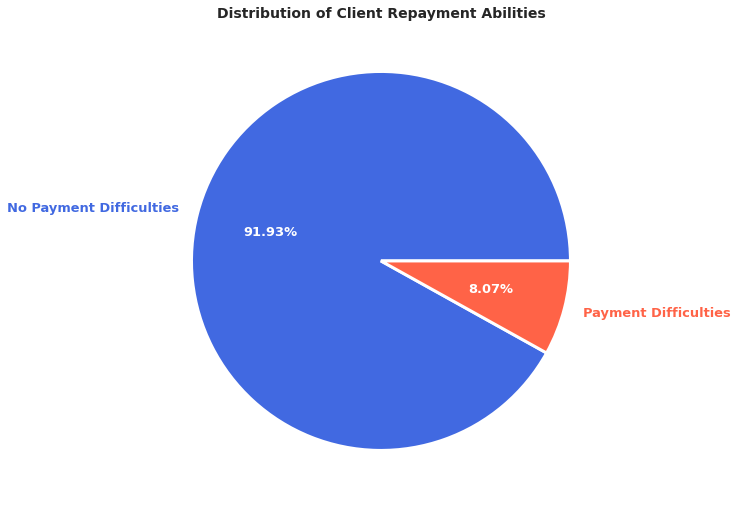

In [ ]:
# visualization
sns.set_style('whitegrid')
labels = ['No Payment Difficulties', 'Payment Difficulties']
colors = ['royalblue', 'tomato']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(10, 10))

patches, texts, pcts = plt.pie(target_group['total'], labels=labels, autopct='%.2f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'fontsize': 13})

# for each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=600)
plt.setp(texts, fontweight=600)
ax.set_title('Distribution of Client Repayment Abilities', fontsize=14, fontweight='bold')
plt.tight_layout()

There are about 91% loans which is equal to about 282K with `TARGET` = 0, which indicates that client did not had any problems in repaying the loan in given time. While only 9% of the total loans (about 24K applicants) in this dataset involved the clients having problems in repaying the loan.

**Note**: This dataset is imbalanced and it does require special treatment or resampling. The resampling step will be carried out in the model building section.

## Bivariate Analysis

### Contract Type Vs. Target

In [ ]:
ct = df_train.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Contract Type')
ct.sort_values(by='SK_ID_CURR', ascending=False)

Clients Repayment Abilities By Contract Type


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,No Payment Difficulties,255011
2,Revolving loans,No Payment Difficulties,27675
1,Cash loans,Payment Difficulties,23221
3,Revolving loans,Payment Difficulties,1604


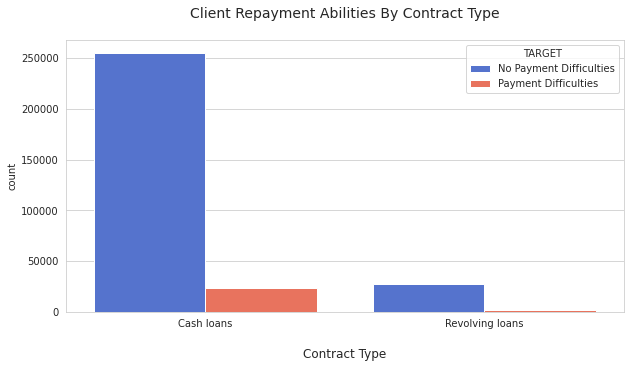

In [ ]:
# visualization
plt.figure(figsize=(10,5))
colors = ['royalblue','tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=df_train, x='NAME_CONTRACT_TYPE', hue='TARGET', hue_order=['No Payment Difficulties', 'Payment Difficulties'])
plt.title('Client Repayment Abilities By Contract Type\n', fontsize=14)
plt.xlabel('\nContract Type', fontsize=12);

*   Cash loans with around 278K loans accounted for the majority of total loans in this dataset. Revolving loans have a much lower amount of around 29K compared to cash loans.


### Gender Vs. Target

In [ ]:
df_train['CODE_GENDER'] = df_train['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [ ]:
gt = df_train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Gender')
gt.sort_values(by='SK_ID_CURR', ascending=False)

Clients Repayment Abilities By Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,No Payment Difficulties,188278
2,Male,No Payment Difficulties,94404
1,Female,Payment Difficulties,14170
3,Male,Payment Difficulties,10655
4,XNA,No Payment Difficulties,4


In [ ]:
app_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by='TARGET', ascending=False)

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


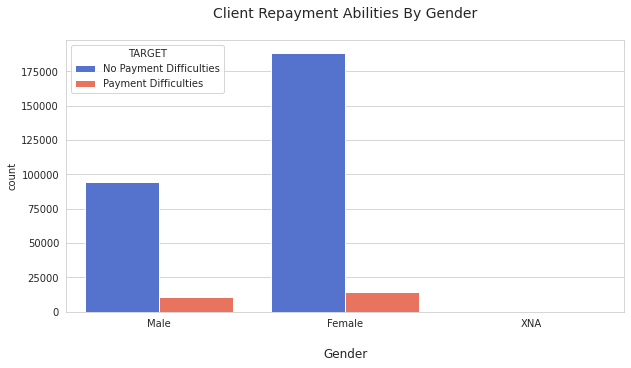

In [ ]:
# visualization
plt.figure(figsize=(10,5))
colors = ['royalblue','tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=df_train, x='CODE_GENDER', hue='TARGET', hue_order=['No Payment Difficulties', 'Payment Difficulties'])
plt.title('Client Repayment Abilities By Gender\n', fontsize=14)
plt.xlabel('\nGender', fontsize=12);

*   Women have applied for a larger majority of loans. In total, there are about 202,448 loan applications applied by women, and about 105,059 applications applied by men.
*   However, a larger percentage (about 10% of the total) of men had the problems repaying the loan compared to women clients (about 7%).





### Car Ownership Status Vs Target

In [ ]:
df_train['FLAG_OWN_CAR'] = df_train['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])

In [ ]:
cos = df_train.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Car Ownership Status')
cos.sort_values(by='SK_ID_CURR', ascending=False)

Clients Repayment Abilities By Car Ownership Status


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,No,No Payment Difficulties,185675
2,Yes,No Payment Difficulties,97011
1,No,Payment Difficulties,17249
3,Yes,Payment Difficulties,7576


In [ ]:
app_train[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


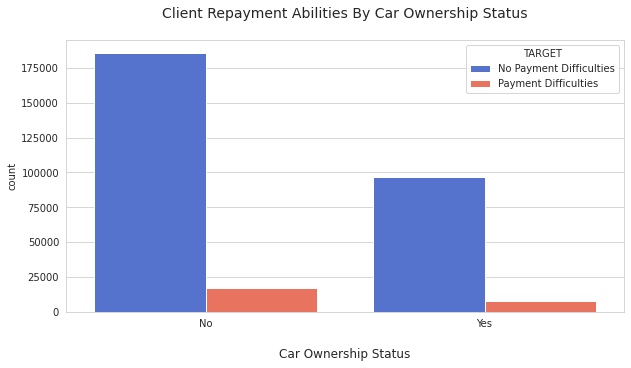

In [ ]:
# visualization
plt.figure(figsize=(10,5))
colors = ['royalblue','tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=df_train, x='FLAG_OWN_CAR', hue='TARGET', hue_order=['No Payment Difficulties', 'Payment Difficulties'])
plt.title('Client Repayment Abilities By Car Ownership Status\n', fontsize=14)
plt.xlabel('\nCar Ownership Status', fontsize=12);

*   Most of the clients do not own a car.
*   Clients who own a car (about 8%) had the problems in repaying the loan compared to clients who not own a car (about 7%). However, the difference is not very significant.



### Realty Ownership Status Vs Target

In [ ]:
df_train['FLAG_OWN_REALTY'] = df_train['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])

In [ ]:
ros = df_train.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Realty Ownership Status')
ros.sort_values(by='SK_ID_CURR', ascending=False)

Clients Repayment Abilities By Realty Ownership Status


,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
2,Yes,No Payment Difficulties,196329
0,No,No Payment Difficulties,86357
3,Yes,Payment Difficulties,16983
1,No,Payment Difficulties,7842


In [ ]:
app_train[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


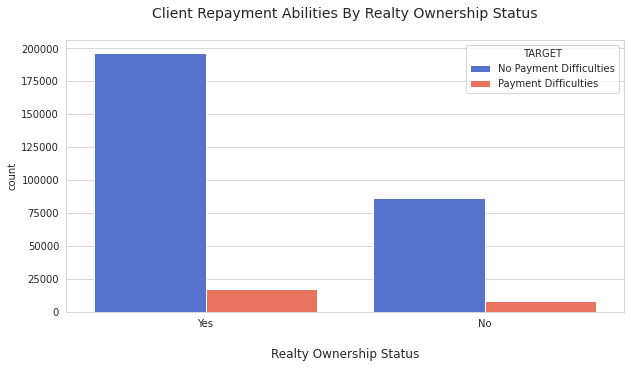

In [ ]:
# visualization
plt.figure(figsize=(10,5))
colors = ['royalblue','tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=df_train, x='FLAG_OWN_REALTY', hue='TARGET', hue_order=['No Payment Difficulties', 'Payment Difficulties'])
plt.title('Client Repayment Abilities By Realty Ownership Status\n', fontsize=14)
plt.xlabel('\nRealty Ownership Status', fontsize=12);

*   Most of the clients own a flat/house.
*   Clients who own a house/flat (about 8%) had the problems in repaying the loan compared to clients who not own a house/flat (about 7%). However, the difference is not very significant.



### Suite Type Vs. Target

In [ ]:
st = df_train.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
st.sort_values(by='SK_ID_CURR', ascending=False)

Clients Repayment Abilities By Suite Type


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
12,Unaccompanied,No Payment Difficulties,228189
2,Family,No Payment Difficulties,37140
13,Unaccompanied,Payment Difficulties,20337
10,"Spouse, partner",No Payment Difficulties,10475
0,Children,No Payment Difficulties,3026
3,Family,Payment Difficulties,3009
8,Other_B,No Payment Difficulties,1596
11,"Spouse, partner",Payment Difficulties,895
6,Other_A,No Payment Difficulties,790
4,Group of people,No Payment Difficulties,248


In [ ]:
app_train[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098305
3,Other_A,0.087760
2,Group of people,0.084871
6,Unaccompanied,0.081830
5,"Spouse, partner",0.078716
1,Family,0.074946
0,Children,0.073768


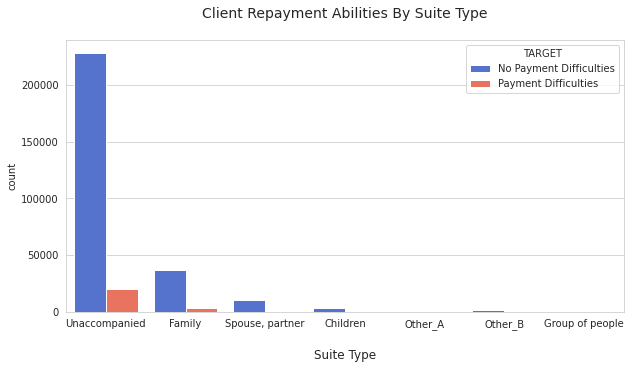

In [ ]:
# visualization
plt.figure(figsize=(10,5))
colors = ['royalblue','tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=df_train, x='NAME_TYPE_SUITE', hue='TARGET', hue_order=['No Payment Difficulties', 'Payment Difficulties'])
plt.title('Client Repayment Abilities By Suite Type\n', fontsize=14)
plt.xlabel('\nSuite Type', fontsize=12);

*   Clients who are Unaccompanied have applied for a larger majority of loans, there are about 158,774 loan applications and 20337 client having difficulty repaying the loan.
*   Clients who are accompanied by other_b when applying for a loan have a higher percentage of having difficulty repaying the loan (about 10%).



### Income Type Vs. Target

In [ ]:
it = df_train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
it.sort_values(by='SK_ID_CURR', ascending=False)

Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
12,Working,No Payment Difficulties,143550
1,Commercial associate,No Payment Difficulties,66257
5,Pensioner,No Payment Difficulties,52380
7,State servant,No Payment Difficulties,20454
13,Working,Payment Difficulties,15224
2,Commercial associate,Payment Difficulties,5360
6,Pensioner,Payment Difficulties,2982
8,State servant,Payment Difficulties,1249
9,Student,No Payment Difficulties,18
10,Unemployed,No Payment Difficulties,14


In [ ]:
app_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


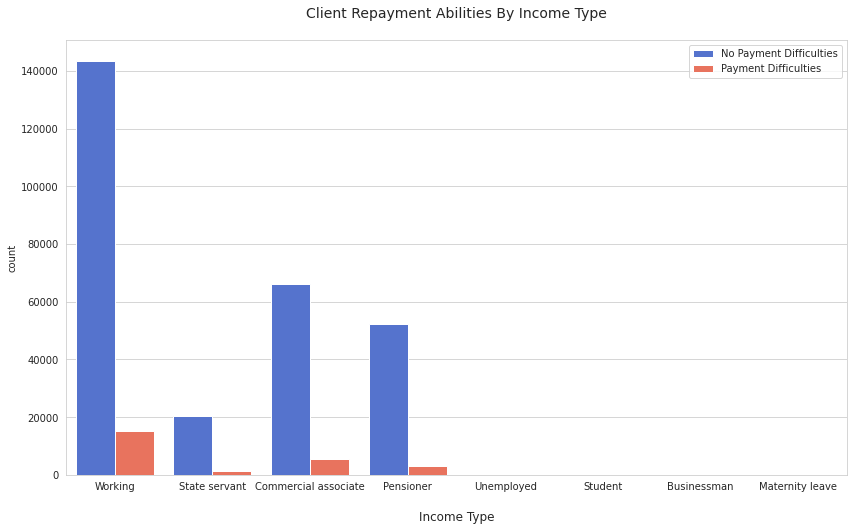

In [ ]:
# visualization
plt.figure(figsize=(14,8))
colors = ['royalblue','tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=df_train, x='NAME_INCOME_TYPE', hue='TARGET', hue_order=['No Payment Difficulties', 'Payment Difficulties'])
plt.title('Client Repayment Abilities By Income Type\n', fontsize=14)
plt.xlabel('\nIncome Type', fontsize=12)
plt.legend(loc=1);

*   Clients who have income type of working have applied for a larger majority of loans, there are about 158,774 loan applications.
*   Clients with the income type of businessman and student have no difficulty in repaying their loans.
*   While, clients with the income type of maternity leaves and unemployed have the highest percentage (about 40% and 36%) of TARGET = 1, ie. having problem in repaying the loans.


### Education Type Vs. Target

In [ ]:
et = df_train.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Education Type')
et.sort_values(by='SK_ID_CURR', ascending=False)

Clients Repayment Abilities By Education Type


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
8,Secondary / secondary special,No Payment Difficulties,198867
2,Higher education,No Payment Difficulties,70854
9,Secondary / secondary special,Payment Difficulties,19524
4,Incomplete higher,No Payment Difficulties,9405
3,Higher education,Payment Difficulties,4009
6,Lower secondary,No Payment Difficulties,3399
5,Incomplete higher,Payment Difficulties,872
7,Lower secondary,Payment Difficulties,417
0,Academic degree,No Payment Difficulties,161
1,Academic degree,Payment Difficulties,3


In [ ]:
app_train[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


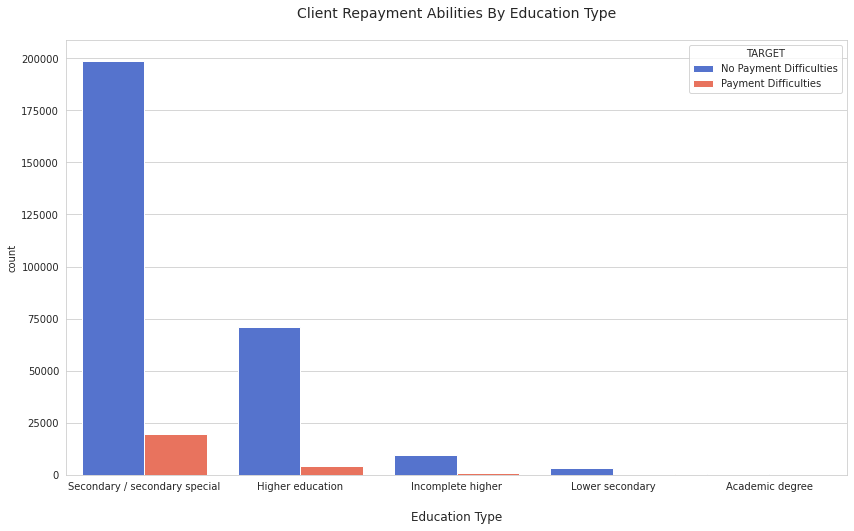

In [ ]:
# visualization
plt.figure(figsize=(14,8))
colors = ['royalblue','tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=df_train, x='NAME_EDUCATION_TYPE', hue='TARGET', hue_order=['No Payment Difficulties', 'Payment Difficulties'])
plt.title('Client Repayment Abilities By Education Type\n', fontsize=14)
plt.xlabel('\nEducation Type', fontsize=12);

*   A large number of applications (218K) are filed by client having secondary education followed by people with higher education with 75K applications.
*   While, it can be seen that the clients with the education type of lower secondary has the highest percentage (around 10%) of TARGET = 1, ie. having problem in repaying the loans.





### Family Status Vs. Target

In [ ]:
ft = df_train.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Family Status')
ft.sort_values(by='SK_ID_CURR', ascending=False)

Clients Repayment Abilities By Family Status


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
2,Married,No Payment Difficulties,181582
6,Single / not married,No Payment Difficulties,40987
0,Civil marriage,No Payment Difficulties,26814
4,Separated,No Payment Difficulties,18150
9,Widow,No Payment Difficulties,15151
3,Married,Payment Difficulties,14850
7,Single / not married,Payment Difficulties,4457
1,Civil marriage,Payment Difficulties,2961
5,Separated,Payment Difficulties,1620
10,Widow,Payment Difficulties,937


In [ ]:
app_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


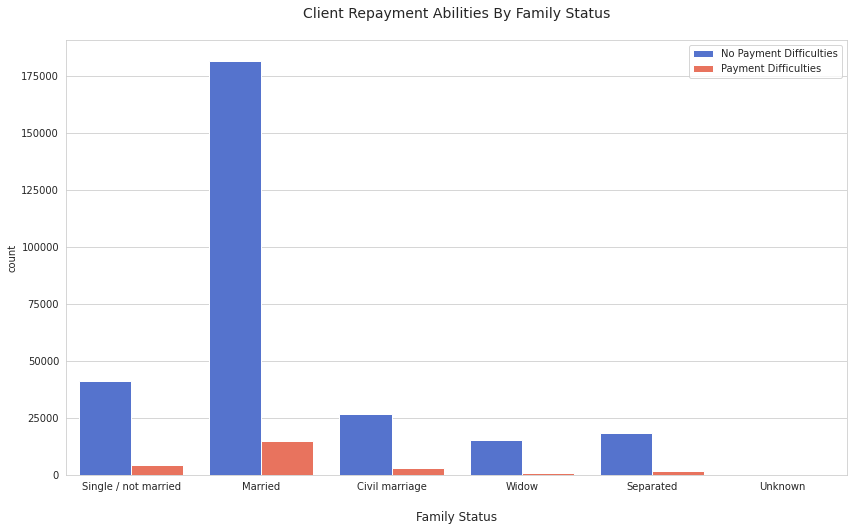

In [ ]:
# visualization
plt.figure(figsize=(14,8))
colors = ['royalblue','tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=df_train, x='NAME_FAMILY_STATUS', hue='TARGET', hue_order=['No Payment Difficulties', 'Payment Difficulties'])
plt.title('Client Repayment Abilities By Family Status\n', fontsize=14)
plt.xlabel('\nFamily Status', fontsize=12)
plt.legend(loc=1);

*   Clients who are married have applied for a larger majority of loans, there are about 196,432 loan applications.
*   Clients with family status of civil marriage and single have the highest percentage (around 9%) of clients who have problem in repaying the loans.


### Housing Type Vs. Target

In [ ]:
ht = df_train.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Housing Type')
ht.sort_values(by='SK_ID_CURR', ascending=False)

Clients Repayment Abilities By Housing Type


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
2,House / apartment,No Payment Difficulties,251596
3,House / apartment,Payment Difficulties,21272
10,With parents,No Payment Difficulties,13104
4,Municipal apartment,No Payment Difficulties,10228
8,Rented apartment,No Payment Difficulties,4280
6,Office apartment,No Payment Difficulties,2445
11,With parents,Payment Difficulties,1736
0,Co-op apartment,No Payment Difficulties,1033
5,Municipal apartment,Payment Difficulties,955
9,Rented apartment,Payment Difficulties,601


In [ ]:
app_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


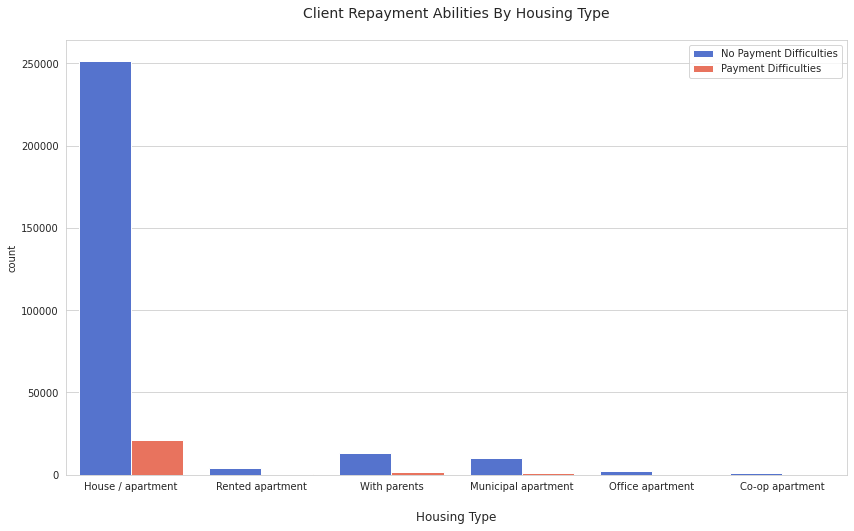

In [ ]:
# visualization
plt.figure(figsize=(14,8))
colors = ['royalblue','tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=df_train, x='NAME_HOUSING_TYPE', hue='TARGET', hue_order=['No Payment Difficulties', 'Payment Difficulties'])
plt.title('Client Repayment Abilities By Housing Type\n', fontsize=14)
plt.xlabel('\nHousing Type', fontsize=12)
plt.legend(loc=1);

*   Clients living in House / apartments has the highest number of loan apllications equal to 272K.
*   While, it can be seen that the clients with housing type of rented apartment has the highest percentage (around 12%) in difficulty in repaying the loans.



### Occupation Type Vs. Target

In [ ]:
ot = df_train.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Occupation Type')
ot.sort_values(by='SK_ID_CURR', ascending=False)

Clients Repayment Abilities By Occupation Type


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
16,Laborers,No Payment Difficulties,49348
28,Sales staff,No Payment Difficulties,29010
6,Core staff,No Payment Difficulties,25832
20,Managers,No Payment Difficulties,20043
8,Drivers,No Payment Difficulties,16496
12,High skill tech staff,No Payment Difficulties,10679
0,Accountants,No Payment Difficulties,9339
22,Medicine staff,No Payment Difficulties,7965
32,Security staff,No Payment Difficulties,5999
17,Laborers,Payment Difficulties,5838


In [ ]:
app_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


*   A large number of applications (55K) are filed by clients who work as Laborers.
*   Clients with occupation type of Low-skill Laborers has the highest percentage (around 17%) of TARGET = 1, ie. having problem in repaying the loans.


### Process Day Vs. Target

In [ ]:
pt = df_train.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Process Day')
pt.sort_values(by='SK_ID_CURR', ascending=False)

Clients Repayment Abilities By Process Day


,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
10,TUESDAY,No Payment Difficulties,49400
12,WEDNESDAY,No Payment Difficulties,47696
2,MONDAY,No Payment Difficulties,46780
8,THURSDAY,No Payment Difficulties,46493
0,FRIDAY,No Payment Difficulties,46237
4,SATURDAY,No Payment Difficulties,31182
6,SUNDAY,No Payment Difficulties,14898
11,TUESDAY,Payment Difficulties,4501
13,WEDNESDAY,Payment Difficulties,4238
1,FRIDAY,Payment Difficulties,4101


In [ ]:
app_train[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
5,TUESDAY,0.083505
6,WEDNESDAY,0.081604
0,FRIDAY,0.081469
4,THURSDAY,0.081003
3,SUNDAY,0.079291
2,SATURDAY,0.078873
1,MONDAY,0.077572


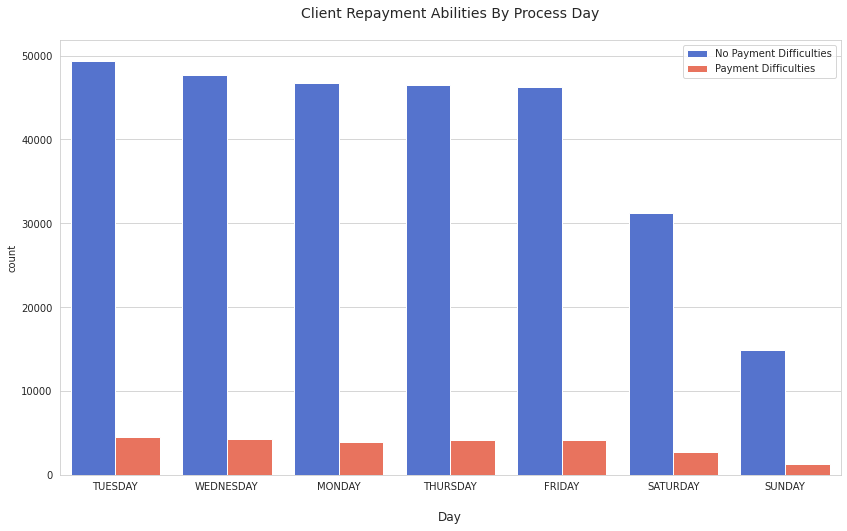

In [ ]:
# visualization
plt.figure(figsize=(14,8))
colors = ['royalblue','tomato']
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(data=df_train,
                    x='WEEKDAY_APPR_PROCESS_START',
                    hue='TARGET',
                    hue_order=['No Payment Difficulties', 'Payment Difficulties'],
                    order=df_train['WEEKDAY_APPR_PROCESS_START'].value_counts().index)
plt.title('Client Repayment Abilities By Process Day\n', fontsize=14)
plt.xlabel('\nDay', fontsize=12)
plt.legend(loc=1);

*   Each application processing day has almost the same percentage (about 7% - 8%) in of TARGET = 1, ie. having problem in repaying the loans.



### Organization Type Vs. Target

In [ ]:
ot = df_train.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Organization Type')
ot.sort_values(by='SK_ID_CURR', ascending=False)

Clients Repayment Abilities By Organization Type


,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
10,Business Entity Type 3,No Payment Difficulties,61669
114,XNA,No Payment Difficulties,52384
84,Self-employed,No Payment Difficulties,34504
66,Other,No Payment Difficulties,15408
60,Medicine,No Payment Difficulties,10456
22,Government,No Payment Difficulties,9678
8,Business Entity Type 2,No Payment Difficulties,9653
78,School,No Payment Difficulties,8367
102,Trade: type 7,No Payment Difficulties,7091
56,Kindergarten,No Payment Difficulties,6396


In [ ]:
app_train[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.157540
18,Industry: type 13,0.134328
25,Industry: type 8,0.125000
38,Restaurant,0.117062
7,Construction,0.116798
6,Cleaning,0.111538
14,Industry: type 1,0.110683
20,Industry: type 3,0.106162
36,Realtor,0.106061
1,Agriculture,0.104727


*   Clients with organization type of transport: type 3 has the highest percentage (around 15%) of TARGET = 1, ie. having problem in repaying the loans.



### Amount Credit Vs. Target

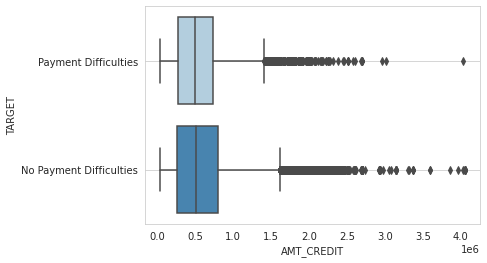

In [ ]:
sns.boxplot(y='TARGET', x='AMT_CREDIT', data=df_train, palette='Blues')
plt.grid()
plt.show()

*   Median value of the credit amount of the clients who have no payment difficulties is slightly larger than the median value of clients who have payment difficulties. It means, the clients with higher credit amount of the loan have a slightly higher chances of being capable of repaying the loan than clients with lower credit amount.


### Amount Income Vs. Target

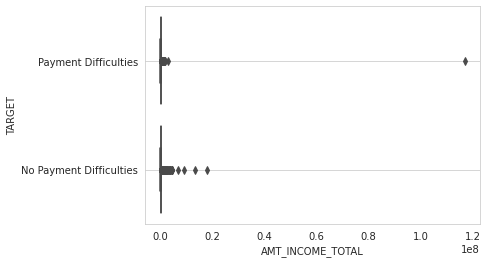

In [ ]:
sns.boxplot(y='TARGET', x='AMT_INCOME_TOTAL', data=df_train, palette='Blues')
plt.grid()
plt.show()

*   Both clients who have payment difficulties as well as clients who have no payment difficulties, have mostly the same value. However, as the client's income increases, the probability that cliets will not have difficulty repaying the loan also increases.


### Age Vs. Target

In [ ]:
no_age = app_train[app_train['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = app_train[app_train['TARGET']==1]['DAYS_BIRTH'].values/-365

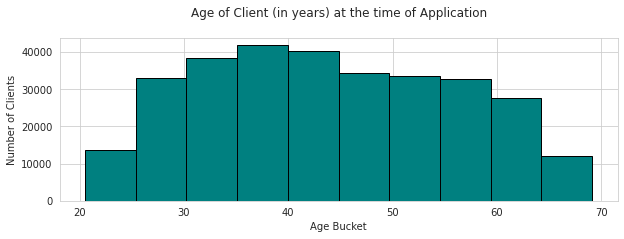

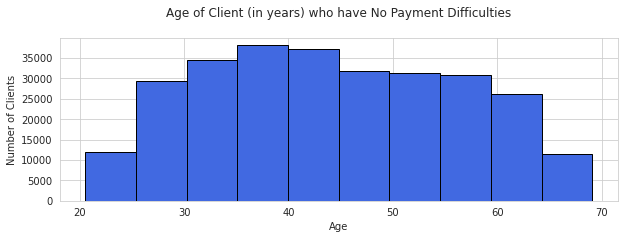

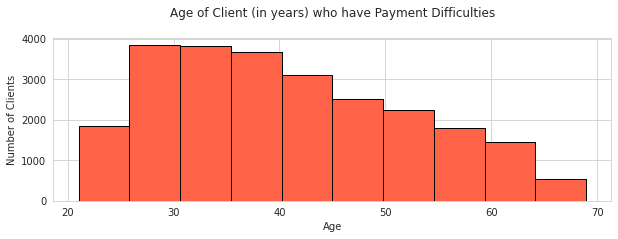

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(df_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='royalblue')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='tomato')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

*   Most number of clients who apply for loans are in the range of 35-40 years, followed by clients in the range of 40-45 years. Meanwhile, the number of applicants for clients aged <25 or age >65 is very low.
*   Clients who have no payment difficulties are client the range of 35-45 years. While clients who have payment difficulties are client the range of 25-35 years.


## Multivariate Analysis

### Car Ownership Status, The Number of Children, Target, and Realty Ownership Status

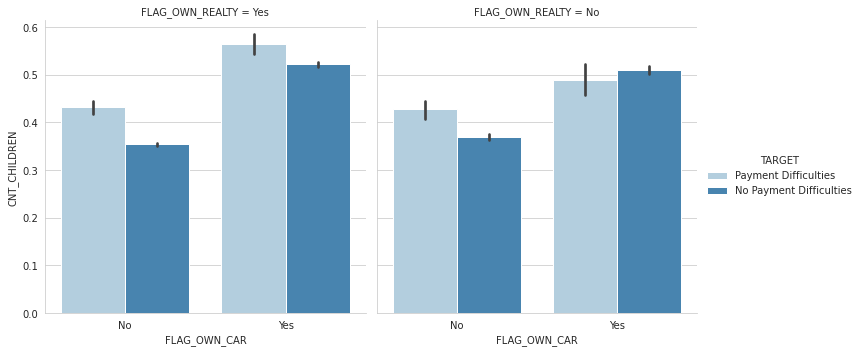

In [ ]:
sns.catplot(x='FLAG_OWN_CAR',
            y='CNT_CHILDREN', 
            hue='TARGET', 
            col='FLAG_OWN_REALTY', 
            kind='bar',
            palette='Blues',
            data=df_train)
plt.show()

*   Clients who own a car and a house/flat have a problem repaying the loans for a high number of children compared to clients who do not own houses/flat



### Income Type, Amount of Goods Price, Target, and Realty Ownership Status

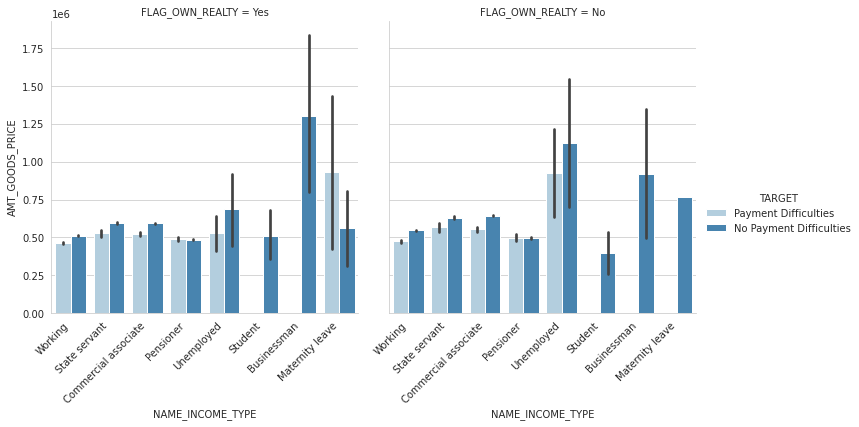

In [ ]:
fig = sns.catplot(x='NAME_INCOME_TYPE',
                  y='AMT_GOODS_PRICE', 
                  hue='TARGET', 
                  col='FLAG_OWN_REALTY', 
                  kind='bar',
                  palette='Blues',
                  data=df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

*   Clients with income type of maternity leave in FLAG_OWN_REALTY = Yes (i.e own a house/flat) have a problem repaying the loans compared to when FLAG_OWN_REALTY = No (i.e not own a house/flat).


### Family Status, Amount of Income, Target, and Realty Ownership Status

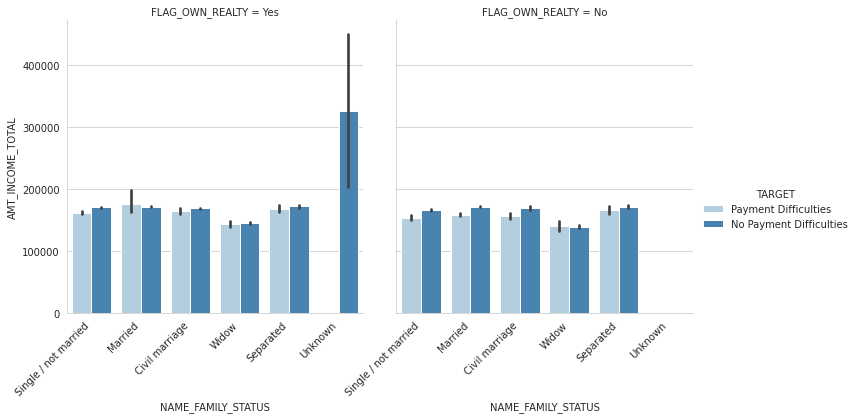

In [ ]:
fig = sns.catplot(x='NAME_FAMILY_STATUS',
                  y='AMT_INCOME_TOTAL', 
                  hue='TARGET', 
                  col='FLAG_OWN_REALTY', 
                  kind='bar',
                  palette='Blues',
                  data=df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

*   Clients who are married and own a house/flat (FLAG_OWN_REALTY = Yes) have problem repaying the loans for a medium amount of income compared to when client not own a house/flat (FLAG_OWN_REALTY = No).


### Contract Type, The Number of Children, Target, and Car Ownership Status

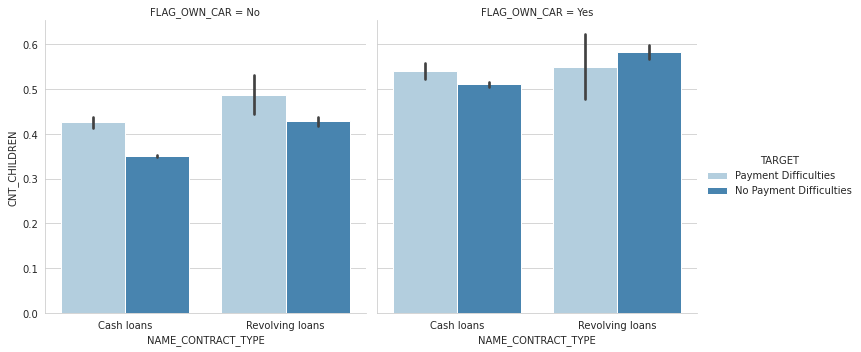

In [ ]:
sns.catplot(x='NAME_CONTRACT_TYPE',
            y='CNT_CHILDREN', 
            hue='TARGET', 
            col='FLAG_OWN_CAR', 
            kind='bar',
            palette='Blues',
            data=df_train)
plt.show()

*   For revolving loans in FLAG_OWN_CAR = No (i.e not own a car) have problem repaying the loans compared to when FLAG_OWN_CAR = Yes (i.e own a car).


### Income Type, Amount of Credit, Target, and Contract Type

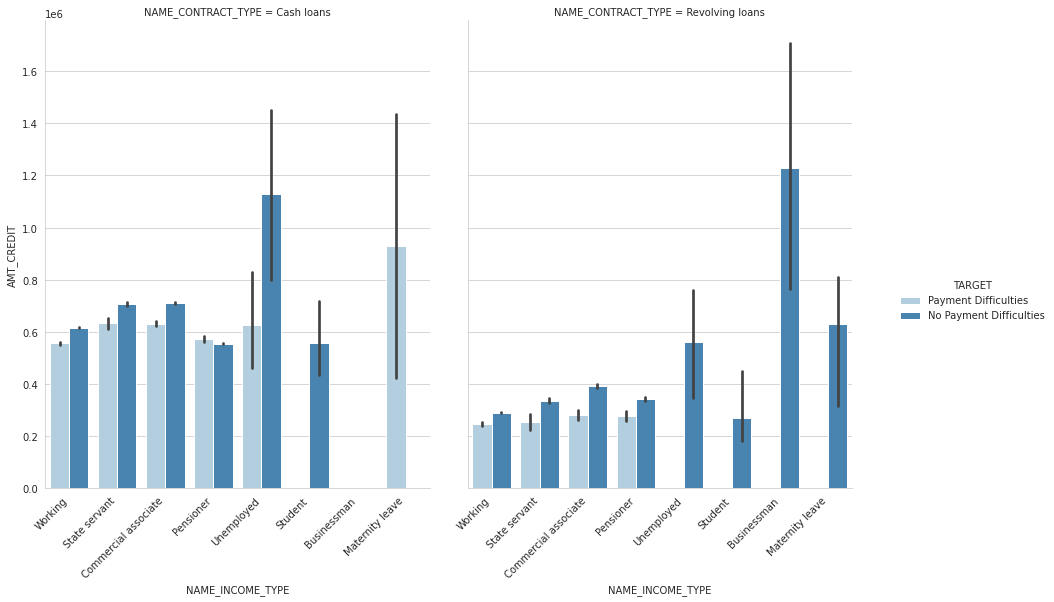

In [ ]:
fig = sns.catplot(x='NAME_INCOME_TYPE',
                  y='AMT_CREDIT', 
                  hue='TARGET', 
                  col='NAME_CONTRACT_TYPE', 
                  kind='bar',
                  palette='Blues',
                  data=df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

*   For the income type of maternity leave with cash loans, all the clients have problems repaying the loans for a medium credit amount of the loan. While all clients with maternity leaves and revolving loans have no difficulty repaying the loans.
*   For unemployed clients with cash loans, more than 50% of clients have problems repaying loans with medium credit amounts of the loan. While all unemployed clients with revolving loans have no difficulty repaying the loan.
*   All student clients have no difficulty repaying the loans either with cash loan or revolving loan for a low to medium credit amount of the loan.


### Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

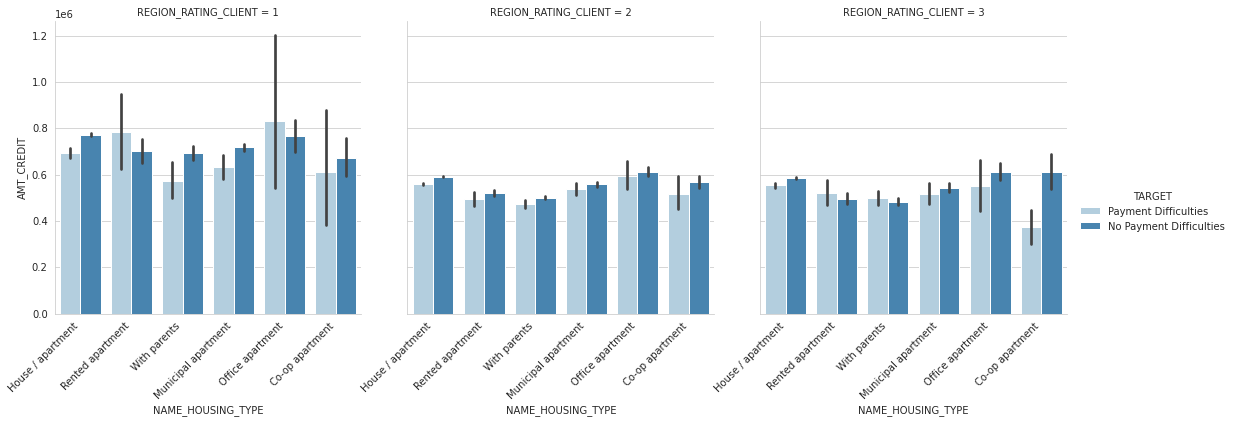

In [ ]:
fig = sns.catplot(x='NAME_HOUSING_TYPE',
                  y='AMT_CREDIT', 
                  hue='TARGET', 
                  col='REGION_RATING_CLIENT', 
                  kind='bar',
                  palette='Blues',
                  data=df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

*   Clients who lives in rented apartment and office apartment and their region have a rating of 1, have a problem repaying the loans compared to client in region with rating of 2 or 3.



### Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

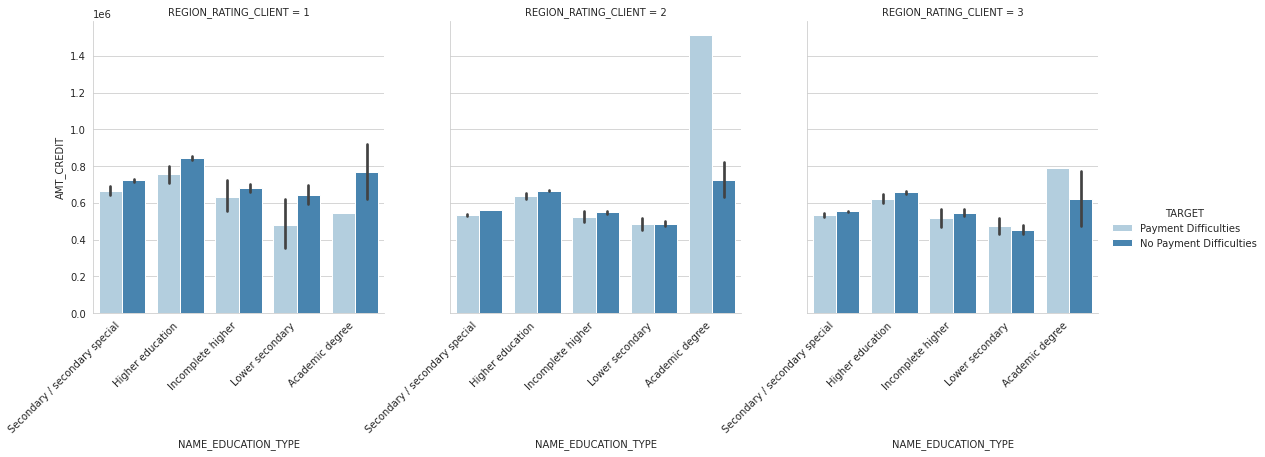

In [ ]:
fig = sns.catplot(x='NAME_EDUCATION_TYPE',
                  y='AMT_CREDIT', 
                  hue='TARGET', 
                  col='REGION_RATING_CLIENT', 
                  kind='bar',
                  palette='Blues',
                  data=df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

*   For client who have academic degree and lives in region with rating of 2, have a problem repaying the loans for higher amount credit of the loan. And, client with the same degree but lives in region with rating of 3 have problem repaying the loans for a medium amount credit of the loan.



### Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives

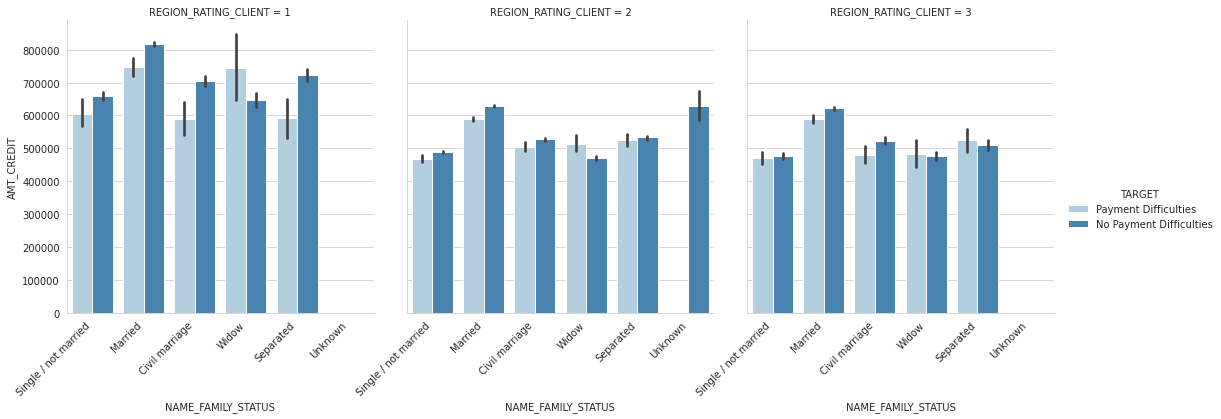

In [ ]:
fig = sns.catplot(x='NAME_FAMILY_STATUS',
                  y='AMT_CREDIT', 
                  hue='TARGET', 
                  col='REGION_RATING_CLIENT', 
                  kind='bar',
                  palette='Blues',
                  data=df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

*   Clients who have a family status as widow, whether they live in a region with a rating of 1, 2, or 3, have problems repaying loans for moderate to high amounts credit of the loan.
*   Clients who have a family status as separated, and live in region with a rating of 3, have problems repaying loans for a moderate amount credit of the loan compared to the clients who live in region with rating of 1 or 2.


# Data Preprocessing

## Drop Feature

In [ ]:
# drop `SK_ID_CURR` as high cardinality col
df.drop('SK_ID_CURR', axis = 1, inplace=True)

## Data Splitting

In [ ]:
# Change target 0 = bad, 1 = good because in scorecard : higher -> better
df['TARGET'] = df['TARGET'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
# define X and Y from df

X = df.drop('TARGET', axis = 1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## Feature Selection

In [ ]:
#grouping X_train by values

X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

### Categorical Features

In [ ]:
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
# chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result.merge(X_train_cat.describe().T.reset_index(),
                  left_on='Feature',
                  right_on='index').sort_values(by=['p-value', 'unique'])

,Feature,p-value,index,count,unique,top,freq
0,NAME_CONTRACT_TYPE,0.000000,NAME_CONTRACT_TYPE,246008,2,Cash loans,222521
2,FLAG_OWN_CAR,0.000000,FLAG_OWN_CAR,246008,2,N,162453
1,CODE_GENDER,0.000000,CODE_GENDER,246008,3,F,162038
6,NAME_EDUCATION_TYPE,0.000000,NAME_EDUCATION_TYPE,246008,5,Secondary / secondary special,174765
7,NAME_FAMILY_STATUS,0.000000,NAME_FAMILY_STATUS,246008,6,Married,157064
8,NAME_HOUSING_TYPE,0.000000,NAME_HOUSING_TYPE,246008,6,House / apartment,218329
14,WALLSMATERIAL_MODE,0.000000,WALLSMATERIAL_MODE,120988,7,Panel,52839
5,NAME_INCOME_TYPE,0.000000,NAME_INCOME_TYPE,246008,8,Working,127003
9,OCCUPATION_TYPE,0.000000,OCCUPATION_TYPE,168853,18,Laborers,44074
11,ORGANIZATION_TYPE,0.000000,ORGANIZATION_TYPE,246008,58,Business Entity Type 3,54447


In [ ]:
#selected categorical features by low cardinality, no null value, and lowest p-value
selected_cat_cols = ['FLAG_OWN_CAR', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE']

In [ ]:
X_train[selected_cat_cols].head()

,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE
246542,N,F,Secondary / secondary special,Married,Pensioner
166649,Y,F,Higher education,Married,Commercial associate
213816,Y,M,Secondary / secondary special,Separated,Commercial associate
255236,N,F,Higher education,Single / not married,Working
254621,Y,M,Secondary / secondary special,Single / not married,Commercial associate


### Numerical Features

In [ ]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
# Calculate F Statistic and corresponding p-values

f_statistics, p_values = f_classif(X_train_num.fillna(X_train_num.median()), y_train)

# convert to a df
anova_f_table = pd.DataFrame(data={'Numerical_Feature': X_train_num.columns.values,
                                   'F-Score': f_statistics,
                                   'p-values': p_values.round(decimals=10)})
anova_f_table.merge(X_train_num.describe().T.reset_index(),
                    left_on='Numerical_Feature',
                    right_on='index').sort_values(['F-Score', 'count'], ascending=False).head(50)

,Numerical_Feature,F-Score,p-values,index,count,mean,std,min,25%,50%,75%,max
28,EXT_SOURCE_2,6518.576280,0.0,EXT_SOURCE_2,245469.0,0.514259,0.191124,8.173617e-08,0.392072,0.565832,0.663627,8.549997e-01
29,EXT_SOURCE_3,5995.804669,0.0,EXT_SOURCE_3,197141.0,0.510714,0.194946,5.272652e-04,0.370650,0.535276,0.669057,8.960095e-01
27,EXT_SOURCE_1,2496.684508,0.0,EXT_SOURCE_1,107420.0,0.501780,0.210815,1.456813e-02,0.334022,0.505721,0.674091,9.516240e-01
6,DAYS_BIRTH,1522.372017,0.0,DAYS_BIRTH,246008.0,-16029.807331,4359.823101,-2.522900e+04,-19673.000000,-15739.000000,-12410.000000,-7.489000e+03
19,REGION_RATING_CLIENT_W_CITY,913.906244,0.0,REGION_RATING_CLIENT_W_CITY,246008.0,2.031239,0.502947,1.000000e+00,2.000000,2.000000,2.000000,3.000000e+00
18,REGION_RATING_CLIENT,860.350408,0.0,REGION_RATING_CLIENT,246008.0,2.052340,0.509193,1.000000e+00,2.000000,2.000000,2.000000,3.000000e+00
77,DAYS_LAST_PHONE_CHANGE,767.742734,0.0,DAYS_LAST_PHONE_CHANGE,246007.0,-963.105456,827.031758,-4.292000e+03,-1570.000000,-757.000000,-274.000000,0.000000e+00
9,DAYS_ID_PUBLISH,674.965486,0.0,DAYS_ID_PUBLISH,246008.0,-2993.689616,1509.386678,-7.197000e+03,-4298.000000,-3256.000000,-1716.000000,0.000000e+00
25,REG_CITY_NOT_WORK_CITY,630.086032,0.0,REG_CITY_NOT_WORK_CITY,246008.0,0.230395,0.421086,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
12,FLAG_EMP_PHONE,512.340368,0.0,FLAG_EMP_PHONE,246008.0,0.820290,0.383946,0.000000e+00,1.000000,1.000000,1.000000,1.000000e+00


In [ ]:
# selected numerical features (temporary) by low null value and low p-values 
temp_num_cols = ['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE','REG_CITY_NOT_WORK_CITY',
                 'DAYS_ID_PUBLISH','FLAG_EMP_PHONE','REG_CITY_NOT_LIVE_CITY','DAYS_EMPLOYED','FLAG_DOCUMENT_3','DAYS_REGISTRATION',
                 'REGION_POPULATION_RELATIVE','LIVE_CITY_NOT_WORK_CITY','AMT_CREDIT','FLAG_DOCUMENT_6','CNT_CHILDREN']

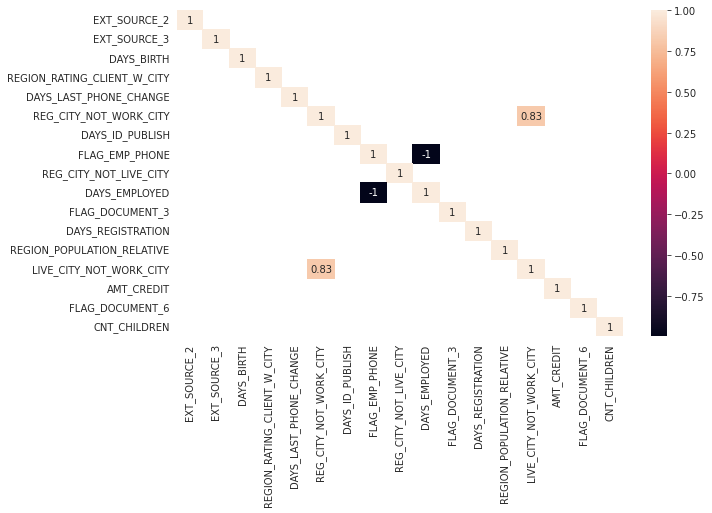

In [ ]:
# an absolute correlation coefficient of > 0.7 among two or more predictors indicates the presence of multicollinearity
var_corr = X_train[temp_num_cols].corr()
fig = plt.figure(figsize = (10,6))
sns.heatmap(var_corr, annot=True, mask = (abs(var_corr) <= 0.7));

In [ ]:
# selected numerical features (final)
selected_num_cols = ['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH',
                     'REG_CITY_NOT_LIVE_CITY','DAYS_EMPLOYED','FLAG_DOCUMENT_3','DAYS_REGISTRATION','REGION_POPULATION_RELATIVE',
                     'LIVE_CITY_NOT_WORK_CITY','AMT_CREDIT','FLAG_DOCUMENT_6','CNT_CHILDREN']

In [ ]:
X_train[selected_num_cols].head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_LIVE_CITY,DAYS_EMPLOYED,FLAG_DOCUMENT_3,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,LIVE_CITY_NOT_WORK_CITY,AMT_CREDIT,FLAG_DOCUMENT_6,CNT_CHILDREN
246542,0.391577,0.413597,-19980,2,-1591.0,-3270,0,365243,1,-7521.0,0.011703,0,127350.0,0,0
166649,0.707909,0.633032,-16598,1,-856.0,-129,0,-298,0,-7925.0,0.072508,0,1227901.5,0,0
213816,0.667288,0.466864,-21515,2,-650.0,-4028,0,-2174,1,-629.0,0.019101,0,1215000.0,0,0
255236,0.708474,NaN,-13342,1,-3.0,-916,0,-5943,1,-7252.0,0.072508,0,450000.0,0,0
254621,0.595523,0.448962,-15974,3,-853.0,-568,0,-1130,1,-217.0,0.003122,0,545040.0,0,0


In [ ]:
selected_cols = selected_cat_cols + selected_num_cols

In [ ]:
# apply feature selection to X_train and X_test
X_train = X_train[selected_cols]
X_test = X_test[selected_cols]

## Data Cleansing

In [ ]:
# fill missing values by median

numimputer = SimpleImputer(strategy = 'median')

In [ ]:
X_train[selected_num_cols] = numimputer.fit_transform(X_train[selected_num_cols])
X_test[selected_num_cols] = numimputer.transform(X_test[selected_num_cols])

In [ ]:
def dummy_creation(df, cols):
    df_dummies = pd.get_dummies(df[cols], prefix_sep=':')
    df = pd.concat([df, df_dummies], axis=1)
    return df

In [ ]:
X_train = dummy_creation(X_train, selected_cat_cols)
X_test = dummy_creation(X_test, selected_cat_cols)

In [ ]:
X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)

In [ ]:
X_train.isnull().sum()

FLAG_OWN_CAR                                         0
CODE_GENDER                                          0
NAME_EDUCATION_TYPE                                  0
NAME_FAMILY_STATUS                                   0
NAME_INCOME_TYPE                                     0
EXT_SOURCE_2                                         0
EXT_SOURCE_3                                         0
DAYS_BIRTH                                           0
REGION_RATING_CLIENT_W_CITY                          0
DAYS_LAST_PHONE_CHANGE                               0
DAYS_ID_PUBLISH                                      0
REG_CITY_NOT_LIVE_CITY                               0
DAYS_EMPLOYED                                        0
FLAG_DOCUMENT_3                                      0
DAYS_REGISTRATION                                    0
REGION_POPULATION_RELATIVE                           0
LIVE_CITY_NOT_WORK_CITY                              0
AMT_CREDIT                                           0
FLAG_DOCUM

## Feature Engineering by Weight of Evidence

In [ ]:
pd.DataFrame({'Information Value': ['< 0.02', '0.02 - 0.1', '0.1 - 0.3', '0.3 - 0.5', '> 0.5'],
              'Variable Predictiveness': ['Not useful for prediction',
                                          'Weak predictive power',
                                          'Medium predictive power',
                                          'Strong predictive power',
                                          'Suspicious predictive power']})

,Information Value,Variable Predictiveness
0,< 0.02,Not useful for prediction
1,0.02 - 0.1,Weak predictive power
2,0.1 - 0.3,Medium predictive power
3,0.3 - 0.5,Strong predictive power
4,> 0.5,Suspicious predictive power


In [ ]:
# create copies of the 4 training sets to be preprocessed using weight of evidence
X_train_prepr = X_train.copy()
y_train_prepr = y_train.copy()
X_test_prepr = X_test.copy()
y_test_prepr = y_test.copy()

### Categorical Features

In [ ]:
# The function takes 3 arguments: a dataframe (X_train_prepr), a string (column name), and a dataframe (y_train_prepr).
# The function returns a dataframe as a result.
def woe_discrete(df, cat_variable_name, y_df):
    df = pd.concat([df[cat_variable_name], y_df], axis = 1)
    df = df.groupby(cat_variable_name, as_index=False).agg({df.columns[1]: ['count', 'sum']})
    df.columns = [cat_variable_name, 'n_obs', 'n_bad']
    df['n_good'] = df['n_obs'] - df['n_bad']
    
    # WOE
    df['total_dist'] = df['n_obs'] / df['n_obs'].sum()
    df['bad_dist'] = df['n_bad'] / df['n_bad'].sum()
    df['good_dist'] = df['n_good'] / df['n_good'].sum()
    df['WoE'] = np.log(df['good_dist'] / df['bad_dist'])
    df = df.sort_values(['WoE'])
    
    # IV 
    df['IV'] = (df['good_dist'] - df['bad_dist']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [ ]:
# set the default style of the graphs to the seaborn style. 
sns.set()

# define a function for plotting WoE across categories that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0):
    plt.figure(figsize=(18, 6))
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    sns.lineplot(x=x, y=y, marker='o', linestyle='--', color='royalblue')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)
    plt.show()

#### Car Ownership Status

In [ ]:
foc = woe_discrete(X_train_prepr, 'FLAG_OWN_CAR', y_train_prepr)
foc

,FLAG_OWN_CAR,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
1,Y,83555,77536,6019,0.339643,0.342855,0.303072,-0.123339,0.007245
0,N,162453,148612,13841,0.660357,0.657145,0.696928,0.058778,0.007245


*   `FLAG_OWN_CAR` have Information Value (IV) < 0.02, it means the feature is not useful for prediction



#### Gender

In [ ]:
# change XNA to female
X_train_prepr['CODE_GENDER'] = X_train_prepr['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

In [ ]:
cg = woe_discrete(X_train_prepr, 'CODE_GENDER', y_train_prepr)
cg

,CODE_GENDER,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,F,162040,150672,11368,0.658678,0.666254,0.572407,-0.151821,0.037502
1,M,83968,75476,8492,0.341322,0.333746,0.427593,0.247792,0.037502


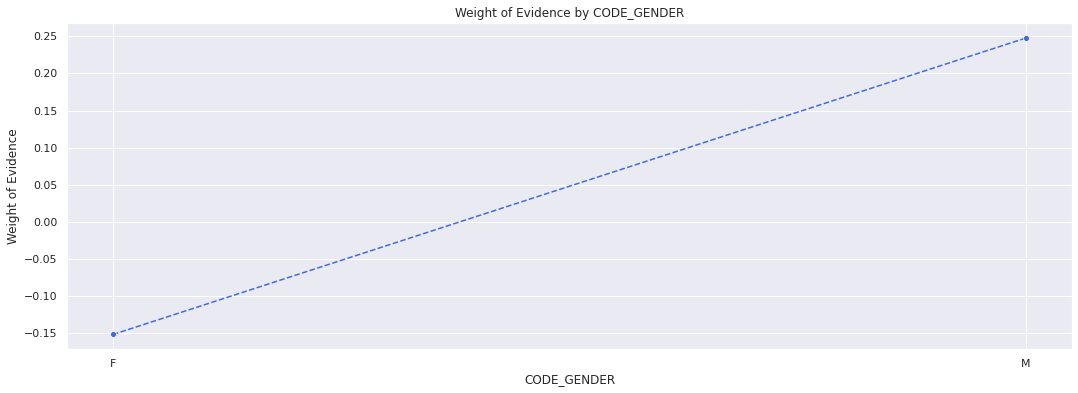

In [ ]:
plot_by_woe(cg)

#### Education Type

In [ ]:
et = woe_discrete(X_train_prepr, 'NAME_EDUCATION_TYPE', y_train_prepr)
et

,NAME_EDUCATION_TYPE,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,Academic degree,124,121,3,0.000504,0.000535,0.000151,-1.264696,0.048773
1,Higher education,59829,56594,3235,0.243199,0.250252,0.162890,-0.429392,0.048773
2,Incomplete higher,8260,7547,713,0.033576,0.033372,0.035901,0.073058,0.048773
4,Secondary / secondary special,174765,159199,15566,0.710404,0.703959,0.783787,0.107416,0.048773
3,Lower secondary,3030,2687,343,0.012317,0.011882,0.017271,0.374032,0.048773


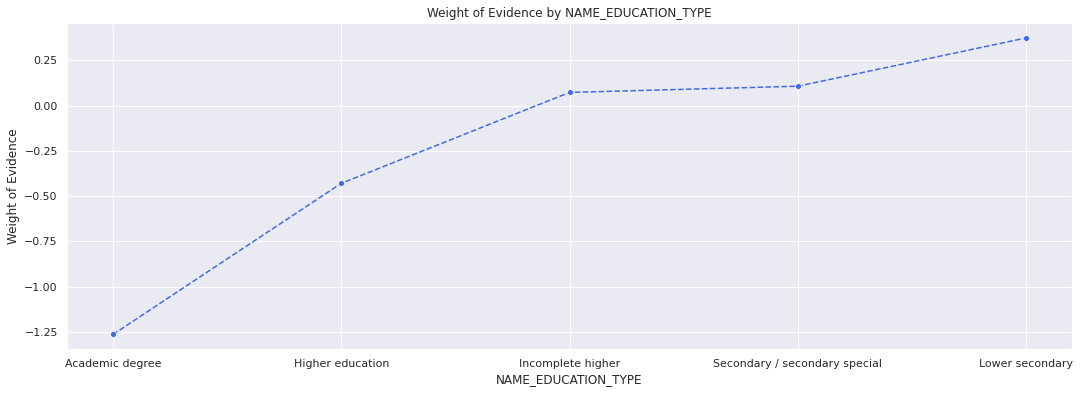

In [ ]:
plot_by_woe(et)

#### Family Status

In [ ]:
# change status Unknown to Single / not married
X_train_prepr['NAME_FAMILY_STATUS'] = X_train_prepr['NAME_FAMILY_STATUS'].apply(lambda x: 'Single / not married' if x == 'Unknown' else x)

In [ ]:
fs = woe_discrete(X_train_prepr, 'NAME_FAMILY_STATUS', y_train_prepr)
fs

,NAME_FAMILY_STATUS,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
4,Widow,12846,12102,744,0.052218,0.053514,0.037462,-0.356603,0.021832
1,Married,157064,145177,11887,0.638451,0.641956,0.598540,-0.070026,0.021832
2,Separated,15853,14568,1285,0.064441,0.064418,0.064703,0.004413,0.021832
3,Single / not married,36381,32818,3563,0.147885,0.145117,0.179406,0.212108,0.021832
0,Civil marriage,23864,21483,2381,0.097005,0.094995,0.119889,0.232741,0.021832


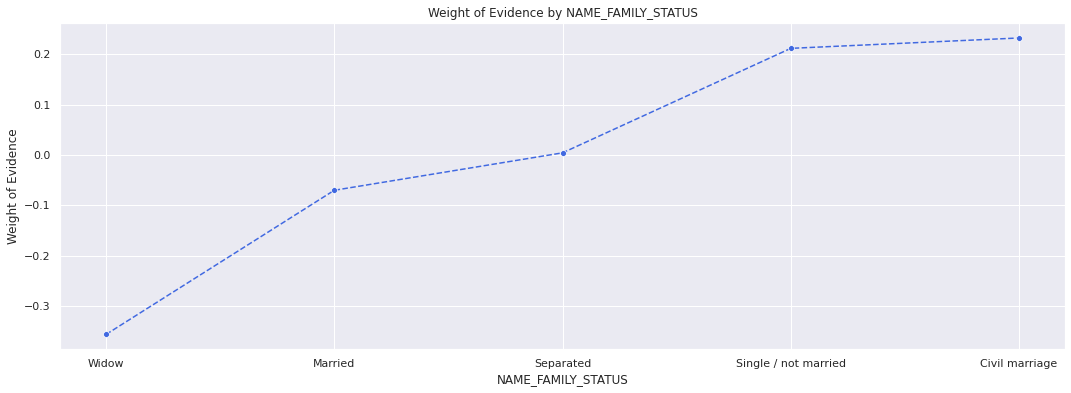

In [ ]:
plot_by_woe(fs)

#### Income Type

In [ ]:
# Change Businessman to Commercial associate, change maternity leave to Pensioner, change student to Unemployed
def nameincometype(incometype):
    if incometype == 'Businessman':
        return 'Commercial associate'
    elif incometype == 'Maternity leave':
        return 'Pensioner'
    elif incometype == 'Student':
        return 'Unemployed'
    else: return incometype

In [ ]:
X_train_prepr['NAME_INCOME_TYPE'] = X_train_prepr['NAME_INCOME_TYPE'].apply(nameincometype)

In [ ]:
it = woe_discrete(X_train_prepr, 'NAME_INCOME_TYPE', y_train_prepr)
it

,NAME_INCOME_TYPE,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
1,Pensioner,44195,41803,2392,0.179649,0.184848,0.120443,-0.428356,0.05812
2,State servant,17505,16518,987,0.071156,0.073041,0.049698,-0.385054,0.05812
0,Commercial associate,57275,52981,4294,0.232818,0.234276,0.216213,-0.080233,0.05812
4,Working,127003,114821,12182,0.516256,0.507725,0.613394,0.189067,0.05812
3,Unemployed,30,25,5,0.000122,0.000111,0.000252,0.823044,0.05812


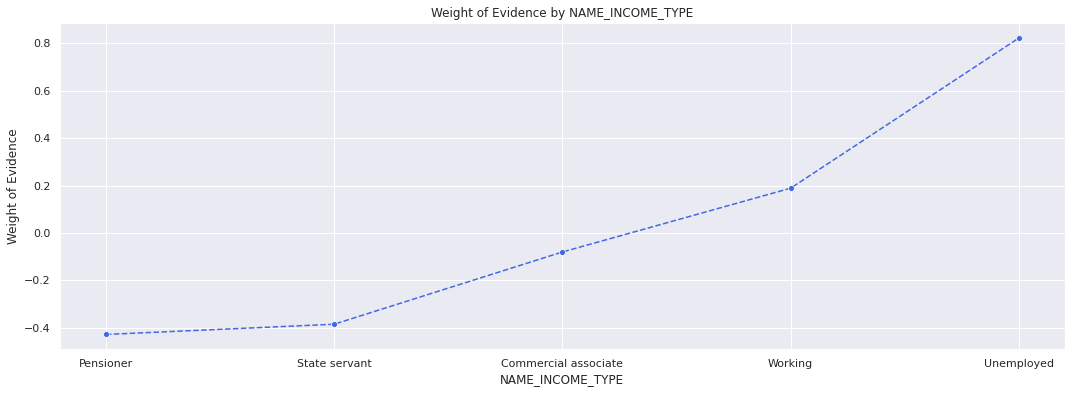

In [ ]:
plot_by_woe(it)

### Numerical Features

In [ ]:
X_train_prepr[selected_num_cols].nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_DOCUMENT_3                     2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_6                     2
REGION_RATING_CLIENT_W_CITY         3
CNT_CHILDREN                       14
REGION_POPULATION_RELATIVE         81
EXT_SOURCE_3                      806
DAYS_LAST_PHONE_CHANGE           3737
AMT_CREDIT                       5289
DAYS_ID_PUBLISH                  6144
DAYS_EMPLOYED                   12057
DAYS_REGISTRATION               15417
DAYS_BIRTH                      17412
EXT_SOURCE_2                   108834
dtype: int64

In [ ]:
# define a function to calculate WoE of continuous variables

def woe_ordered_continuous(df, num_variable_name, y_df):
    df = pd.concat([df[num_variable_name], y_df], axis = 1)
    df = df.groupby(num_variable_name, as_index=False).agg({df.columns[1]: ['count', 'sum']})
    df.columns = [num_variable_name, 'n_obs', 'n_bad']
    df['n_good'] = df['n_obs'] - df['n_bad']
    
    # WOE
    df['total_dist'] = df['n_obs'] / df['n_obs'].sum()
    df['bad_dist'] = df['n_bad'] / df['n_bad'].sum()
    df['good_dist'] = df['n_good'] / df['n_good'].sum()
    df['WoE'] = np.log(df['good_dist'] / df['bad_dist'])
    #df = df.sort_values(['WoE'])
    
    # IV 
    df['IV'] = (df['good_dist'] - df['bad_dist']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

#### Registration City Not Live City

In [ ]:
rcnlc = woe_ordered_continuous(X_train_prepr, 'REG_CITY_NOT_LIVE_CITY', y_train_prepr)
rcnlc

,REG_CITY_NOT_LIVE_CITY,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,0.0,226815,209306,17509,0.921982,0.925527,0.881621,-0.048600,0.022482
1,1.0,19193,16842,2351,0.078018,0.074473,0.118379,0.463447,0.022482


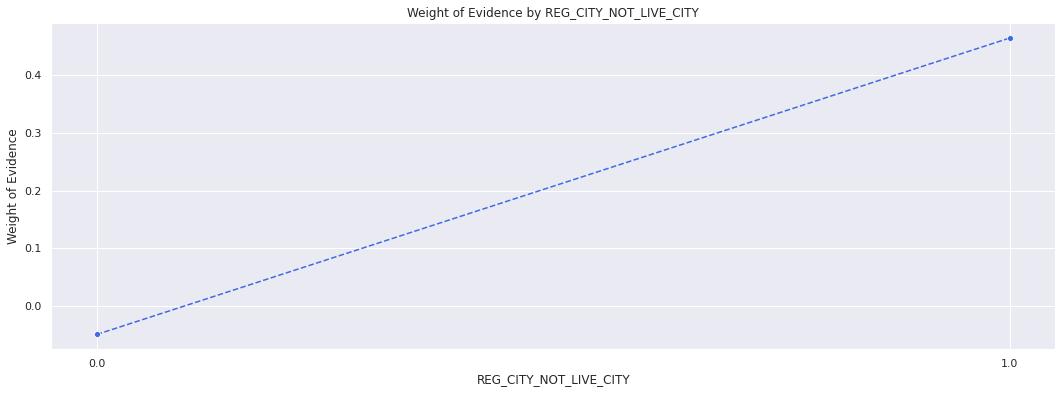

In [ ]:
plot_by_woe(rcnlc)

#### Flag Document 3

In [ ]:
fd3 = woe_ordered_continuous(X_train_prepr, 'FLAG_DOCUMENT_3', y_train_prepr)
fd3

,FLAG_DOCUMENT_3,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,0.0,71435,67034,4401,0.290377,0.296417,0.221601,-0.290886,0.029323
1,1.0,174573,159114,15459,0.709623,0.703583,0.778399,0.101052,0.029323


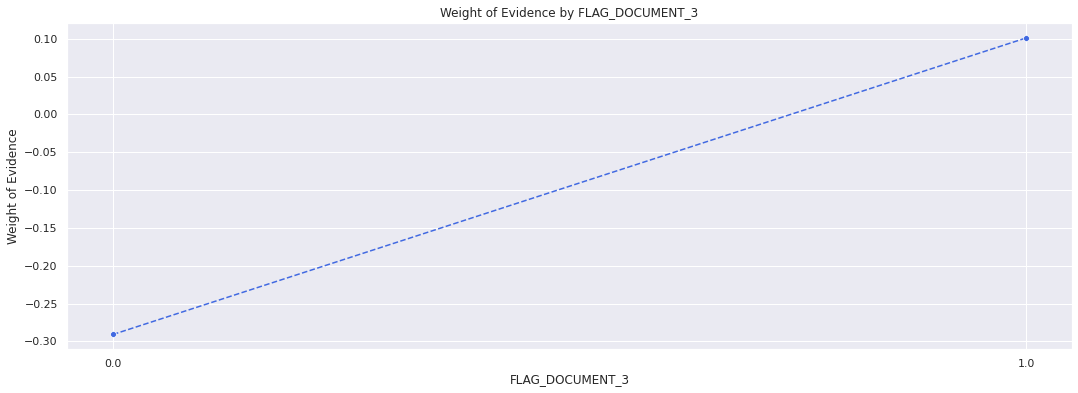

In [ ]:
plot_by_woe(fd3)

#### Live City Not Work City

In [ ]:
lcnwc = woe_ordered_continuous(X_train_prepr, 'LIVE_CITY_NOT_WORK_CITY', y_train_prepr)
lcnwc

,LIVE_CITY_NOT_WORK_CITY,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,0.0,201813,186319,15494,0.820351,0.823881,0.780161,-0.054525,0.012078
1,1.0,44195,39829,4366,0.179649,0.176119,0.219839,0.221734,0.012078


*   `LIVE_CITY_NOT_WORK_CITY` have Information Value (IV) < 0.02, it means the feature is not useful for prediction



#### Flag Document 6

In [ ]:
fd6 = woe_ordered_continuous(X_train_prepr, 'FLAG_DOCUMENT_6', y_train_prepr)
fd6

,FLAG_DOCUMENT_6,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,0.0,224339,205678,18661,0.911917,0.909484,0.939627,0.032606,0.013191
1,1.0,21669,20470,1199,0.088083,0.090516,0.060373,-0.404991,0.013191


*   `FLAG_DOCUMENT_6` have Information Value (IV) < 0.02, it means the feature is not useful for prediction

#### Region Rating Client with City

In [ ]:
rrcwc = woe_ordered_continuous(X_train_prepr, 'REGION_RATING_CLIENT_W_CITY', y_train_prepr)
rrcwc

,REGION_RATING_CLIENT_W_CITY,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,1.0,27392,26071,1321,0.111346,0.115283,0.066516,-0.549953,0.051268
1,2.0,183539,168992,14547,0.746069,0.747263,0.732477,-0.019985,0.051268
2,3.0,35077,31085,3992,0.142585,0.137454,0.201007,0.380049,0.051268


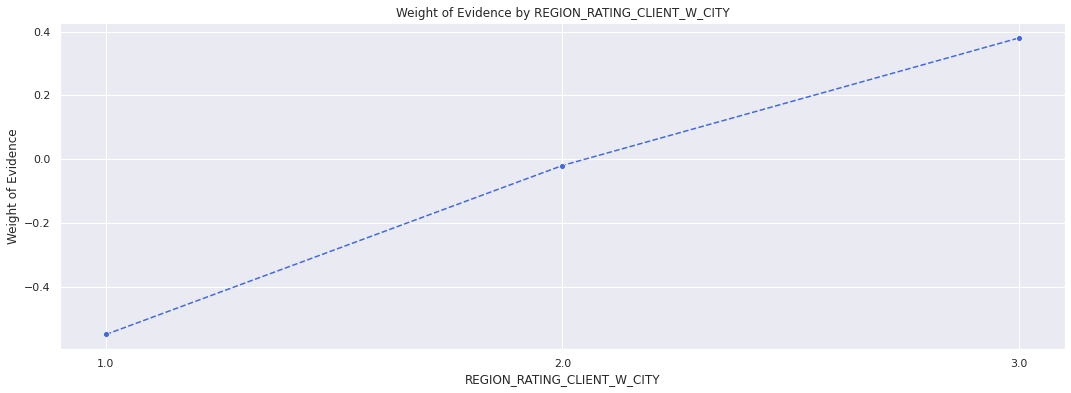

In [ ]:
plot_by_woe(rrcwc)

#### Count Children

In [ ]:
cc = woe_ordered_continuous(X_train_prepr, 'CNT_CHILDREN', y_train_prepr)
cc

,CNT_CHILDREN,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,0.0,172178,158937,13241,0.699888,0.702801,0.666717,-0.052708,inf
1,1.0,49013,44591,4422,0.199233,0.197176,0.222659,0.121542,inf
2,2.0,21440,19567,1873,0.087152,0.086523,0.094310,0.086179,inf
3,3.0,2940,2673,267,0.011951,0.011820,0.013444,0.128774,inf
4,4.0,327,284,43,0.001329,0.001256,0.002165,0.544708,inf
5,5.0,75,69,6,0.000305,0.000305,0.000302,-0.009865,inf
6,6.0,18,12,6,0.000073,0.000053,0.000302,1.739335,inf
7,7.0,6,6,0,0.000024,0.000027,0.000000,-inf,inf
8,8.0,2,2,0,0.000008,0.000009,0.000000,-inf,inf
9,9.0,1,0,1,0.000004,0.000000,0.000050,inf,inf


In [ ]:
# remove children > 6
X_train_prepr_temp = X_train_prepr[X_train_prepr['CNT_CHILDREN'] <= 6].copy()

cc = woe_ordered_continuous(X_train_prepr_temp, 'CNT_CHILDREN', y_train_prepr)
cc

,CNT_CHILDREN,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,0.0,172178,158937,13241,0.699936,0.702847,0.666784,-0.052673,0.006808
1,1.0,49013,44591,4422,0.199247,0.197189,0.222681,0.121576,0.006808
2,2.0,21440,19567,1873,0.087158,0.086529,0.094320,0.086213,0.006808
3,3.0,2940,2673,267,0.011952,0.011820,0.013445,0.128808,0.006808
4,4.0,327,284,43,0.001329,0.001256,0.002165,0.544742,0.006808
5,5.0,75,69,6,0.000305,0.000305,0.000302,-0.009831,0.006808
6,6.0,18,12,6,0.000073,0.000053,0.000302,1.739369,0.006808


*   `LIVE_CITY_NOT_WORK_CITY` have Information Value (IV) < 0.02, it means the feature is not useful for prediction




#### Region Population Relative

In [ ]:
# fine-classing
X_train_prepr['REGION_POPULATION_RELATIVE_factor'] = pd.cut(X_train_prepr['REGION_POPULATION_RELATIVE'], 5)

rpr = woe_ordered_continuous(X_train_prepr, 'REGION_POPULATION_RELATIVE_factor', y_train_prepr)
rpr

,REGION_POPULATION_RELATIVE_factor,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(0.000218, 0.0147]",90449,82858,7591,0.367667,0.366388,0.382226,0.042317,0.026641
1,"(0.0147, 0.0292]",100843,92053,8790,0.409918,0.407048,0.442598,0.083732,0.026641
2,"(0.0292, 0.0436]",37197,34520,2677,0.151202,0.152643,0.134794,-0.124360,0.026641
3,"(0.0436, 0.0581]",10829,10299,530,0.044019,0.045541,0.026687,-0.534443,0.026641
4,"(0.0581, 0.0725]",6690,6418,272,0.027194,0.028380,0.013696,-0.728578,0.026641


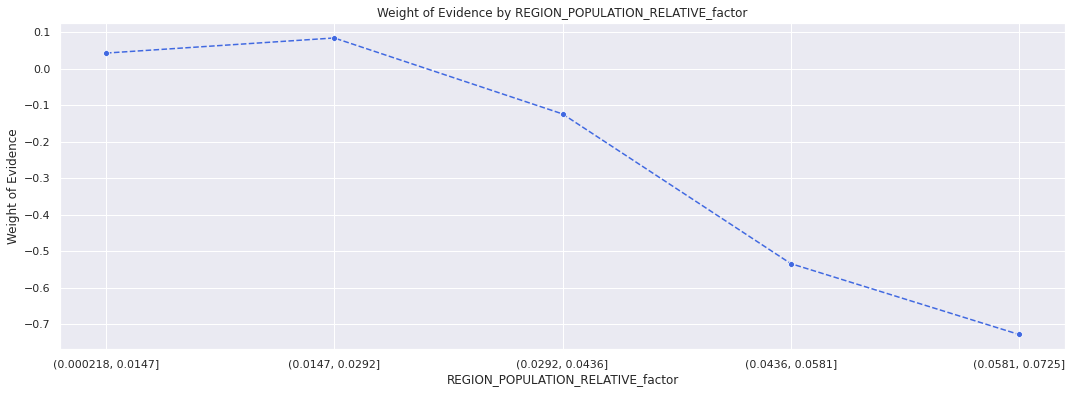

In [ ]:
plot_by_woe(rpr)

#### Days Last Phone Change

In [ ]:
# convert days to year
def toyear(series):
    return -np.floor((series/365))

In [ ]:
# fine-classing
X_train_prepr['YEAR_LAST_PHONE_CHANGE'] = toyear(X_train_prepr['DAYS_LAST_PHONE_CHANGE'])
X_train_prepr['YEAR_LAST_PHONE_CHANGE'] = pd.cut(X_train_prepr['YEAR_LAST_PHONE_CHANGE'], 6)

dlpc = woe_ordered_continuous(X_train_prepr, 'YEAR_LAST_PHONE_CHANGE', y_train_prepr)
dlpc

,YEAR_LAST_PHONE_CHANGE,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(-0.012, 2.0]",120240,108831,11409,0.488765,0.481238,0.574471,0.177088,0.046062
1,"(2.0, 4.0]",54154,49975,4179,0.220131,0.220984,0.210423,-0.048969,0.046062
2,"(4.0, 6.0]",48138,45116,3022,0.195677,0.199498,0.152165,-0.270836,0.046062
3,"(6.0, 8.0]",18782,17747,1035,0.076347,0.078475,0.052115,-0.409333,0.046062
4,"(8.0, 10.0]",4515,4308,207,0.018353,0.019049,0.010423,-0.603028,0.046062
5,"(10.0, 12.0]",179,171,8,0.000728,0.000756,0.000403,-0.629740,0.046062


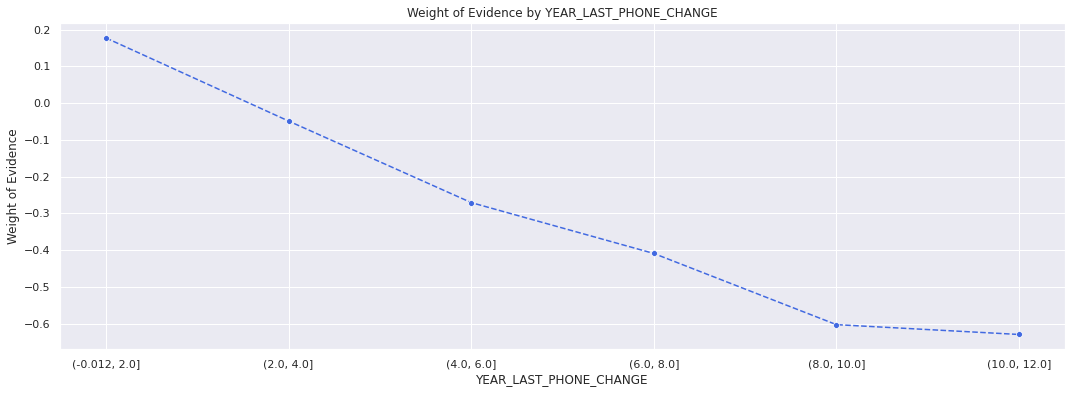

In [ ]:
plot_by_woe(dlpc)

#### Amount Credit

In [ ]:
# fine-classing
X_train_prepr['AMT_CREDIT_factor'] = pd.cut(X_train_prepr['AMT_CREDIT'], 5)

ac = woe_ordered_continuous(X_train_prepr, 'AMT_CREDIT_factor', y_train_prepr)
ac

,AMT_CREDIT_factor,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(40995.0, 846000.0]",190293,173858,16435,0.773524,0.768780,0.827543,0.073656,0.024318
1,"(846000.0, 1647000.0]",50714,47498,3216,0.206148,0.210031,0.161934,-0.260067,0.024318
2,"(1647000.0, 2448000.0]",4666,4470,196,0.018967,0.019766,0.009869,-0.694547,0.024318
3,"(2448000.0, 3249000.0]",317,305,12,0.001289,0.001349,0.000604,-0.802923,0.024318
4,"(3249000.0, 4050000.0]",18,17,1,0.000073,0.000075,0.000050,-0.400731,0.024318


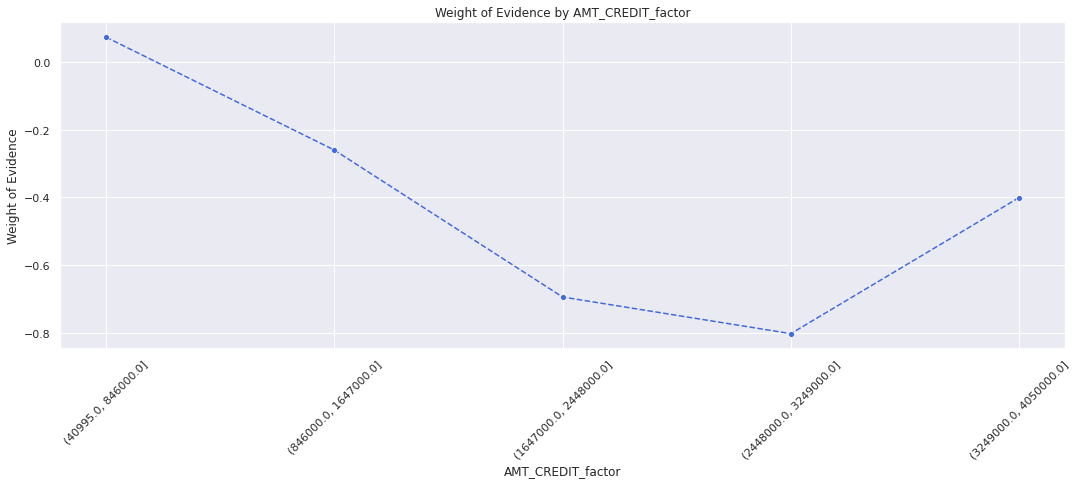

In [ ]:
plot_by_woe(ac, 45)

#### Days ID Publish

In [ ]:
# fine-classing
X_train_prepr['YEAR_ID_PUBLISH'] = toyear(X_train_prepr['DAYS_ID_PUBLISH'])
X_train_prepr['YEAR_ID_PUBLISH'] = pd.cut(X_train_prepr['YEAR_ID_PUBLISH'], 5)

didp = woe_ordered_continuous(X_train_prepr, 'YEAR_ID_PUBLISH', y_train_prepr)
didp

,YEAR_ID_PUBLISH,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(-0.02, 4.0]",52241,46992,5249,0.212355,0.207793,0.264300,0.240542,0.035895
1,"(4.0, 8.0]",57096,52002,5094,0.232090,0.229947,0.256495,0.109263,0.035895
2,"(8.0, 12.0]",82861,76633,6228,0.336822,0.338862,0.313595,-0.077491,0.035895
3,"(12.0, 16.0]",53105,49850,3255,0.215867,0.220431,0.163897,-0.296344,0.035895
4,"(16.0, 20.0]",705,671,34,0.002866,0.002967,0.001712,-0.549927,0.035895


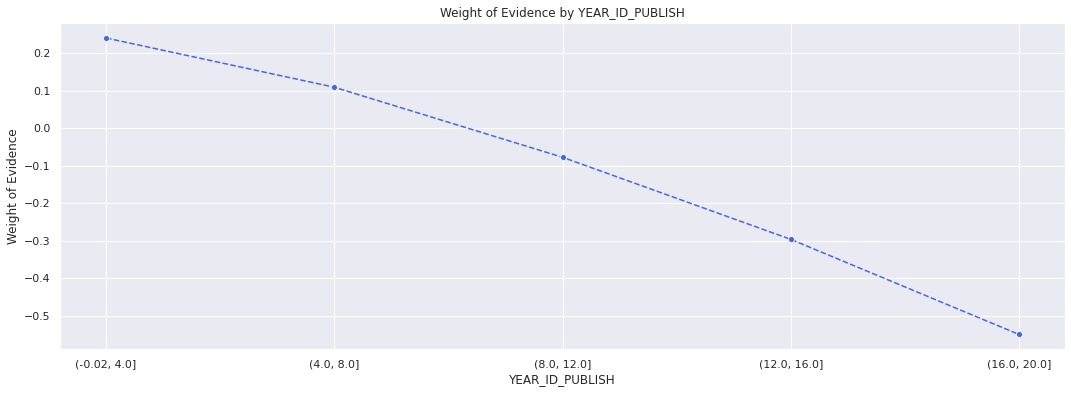

In [ ]:
plot_by_woe(didp)

#### Days Employed

In [ ]:
# fine-classing
X_train_prepr['YEAR_EMPLOYED'] = toyear(X_train_prepr['DAYS_EMPLOYED'])
X_train_prepr['YEAR_EMPLOYED'] = pd.cut(X_train_prepr['YEAR_EMPLOYED'], 4)

de = woe_ordered_continuous(X_train_prepr, 'YEAR_EMPLOYED', y_train_prepr)
de

,YEAR_EMPLOYED,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(-1001.049, -737.75]",44200,41805,2395,0.179669,0.184857,0.120594,-0.427151,0.032326
1,"(-737.75, -475.5]",0,0,0,0.000000,0.000000,0.000000,NaN,0.032326
2,"(-475.5, -213.25]",0,0,0,0.000000,0.000000,0.000000,NaN,0.032326
3,"(-213.25, 49.0]",201808,184343,17465,0.820331,0.815143,0.879406,0.075883,0.032326


*   Although IV score > 0.02 but the result of binning this feature doesn't make sense. So, won't be used as a feature for now



#### Days Registration

In [ ]:
X_train_prepr['YEAR_REGISTRATION'] = toyear(X_train_prepr['DAYS_REGISTRATION'])
X_train_prepr['YEAR_REGISTRATION'] = pd.cut(X_train_prepr['YEAR_REGISTRATION'], 4)

dr = woe_ordered_continuous(X_train_prepr, 'YEAR_REGISTRATION', y_train_prepr)
dr

,YEAR_REGISTRATION,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(-0.068, 17.0]",161752,147509,14243,0.657507,0.652268,0.717170,0.094858,0.021206
1,"(17.0, 34.0]",76957,71726,5231,0.312823,0.317164,0.263394,-0.185769,0.021206
2,"(34.0, 51.0]",7246,6862,384,0.029454,0.030343,0.019335,-0.450630,0.021206
3,"(51.0, 68.0]",53,51,2,0.000215,0.000226,0.000101,-0.806196,0.021206


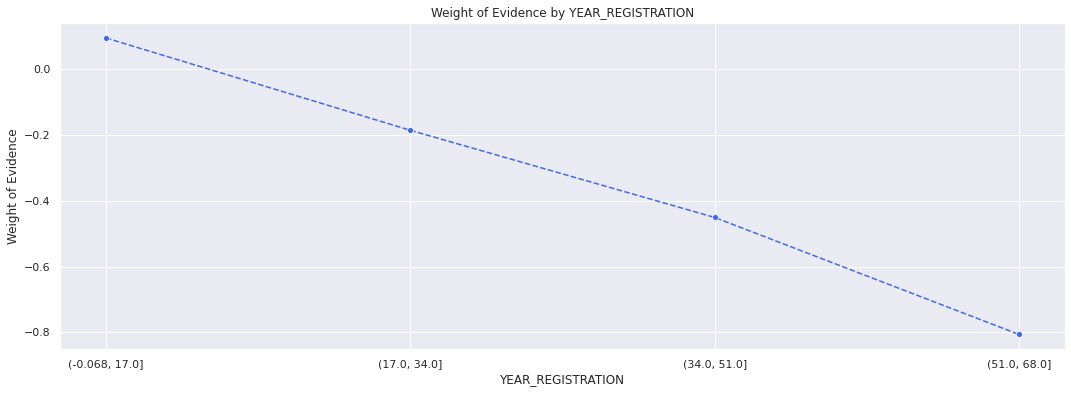

In [ ]:
plot_by_woe(dr)

#### Days Birth

In [ ]:
# fine-classing
X_train_prepr['YEAR_BIRTH'] = toyear(X_train_prepr['DAYS_BIRTH'])
X_train_prepr['YEAR_BIRTH'] = pd.cut(X_train_prepr['YEAR_BIRTH'], 5)

db = woe_ordered_continuous(X_train_prepr, 'YEAR_BIRTH', y_train_prepr)
db

,YEAR_BIRTH,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(20.951, 30.8]",35997,31868,4129,0.146325,0.140917,0.207905,0.388915,0.080286
1,"(30.8, 40.6]",66020,59711,6309,0.268365,0.264035,0.317674,0.184943,0.080286
2,"(40.6, 50.4]",61326,56619,4707,0.249285,0.250363,0.237009,-0.054812,0.080286
3,"(50.4, 60.2]",54357,51027,3330,0.220956,0.225635,0.167674,-0.296901,0.080286
4,"(60.2, 70.0]",28308,26923,1385,0.115069,0.119050,0.069738,-0.534799,0.080286


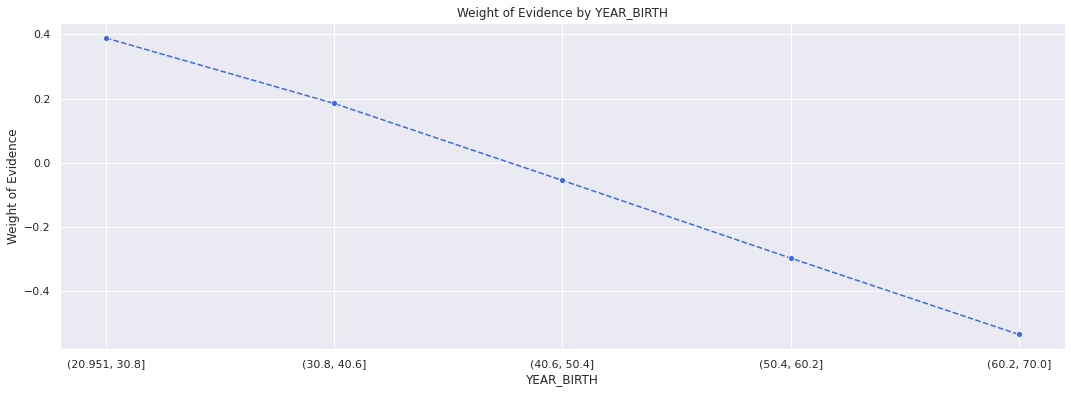

In [ ]:
plot_by_woe(db)

#### External Source 2

In [ ]:
# fine-classing
X_train_prepr['EXT_SOURCE_2_factor'] = pd.cut(X_train_prepr['EXT_SOURCE_2'], 10)

es2 = woe_ordered_continuous(X_train_prepr, 'EXT_SOURCE_2_factor', y_train_prepr)
es2

,EXT_SOURCE_2_factor,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(-0.000855, 0.0855]",7616,5775,1841,0.030958,0.025536,0.092699,1.289253,0.317368
1,"(0.0855, 0.171]",10347,8599,1748,0.042060,0.038024,0.088016,0.839308,0.317368
2,"(0.171, 0.256]",13317,11477,1840,0.054132,0.050750,0.092649,0.601903,0.317368
3,"(0.256, 0.342]",18373,16274,2099,0.074685,0.071962,0.105690,0.384374,0.317368
4,"(0.342, 0.427]",20680,18595,2085,0.084062,0.082225,0.104985,0.244358,0.317368
5,"(0.427, 0.513]",28298,25915,2383,0.115029,0.114593,0.119990,0.046020,0.317368
6,"(0.513, 0.598]",43229,40136,3093,0.175722,0.177477,0.155740,-0.130650,0.317368
7,"(0.598, 0.684]",56324,53224,3100,0.228952,0.235350,0.156093,-0.410625,0.317368
8,"(0.684, 0.769]",42660,41103,1557,0.173409,0.181753,0.078399,-0.840838,0.317368
9,"(0.769, 0.855]",5164,5050,114,0.020991,0.022331,0.005740,-1.358463,0.317368


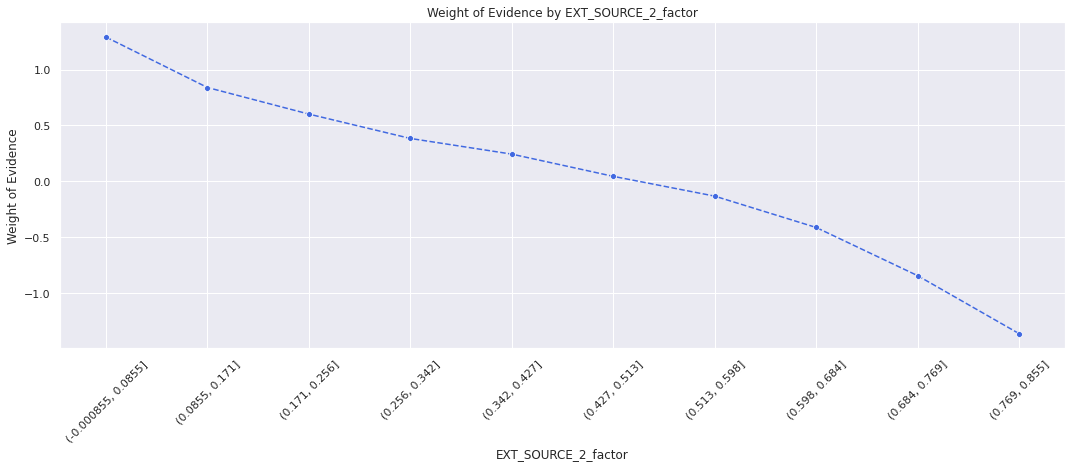

In [ ]:
plot_by_woe(es2, 45)

#### External Source 3

In [ ]:
# fine-classing
X_train_prepr['EXT_SOURCE_3_factor'] = pd.cut(X_train_prepr['EXT_SOURCE_3'], 10)

es3 = woe_ordered_continuous(X_train_prepr, 'EXT_SOURCE_3_factor', y_train_prepr)
es3

,EXT_SOURCE_3_factor,n_obs,n_bad,n_good,total_dist,bad_dist,good_dist,WoE,IV
0,"(-0.000368, 0.0901]",3615,2675,940,0.014695,0.011829,0.047331,1.386657,0.320361
1,"(0.0901, 0.18]",9251,7381,1870,0.037604,0.032638,0.094159,1.059511,0.320361
2,"(0.18, 0.269]",13989,11863,2126,0.056864,0.052457,0.107049,0.713300,0.320361
3,"(0.269, 0.359]",19288,17139,2149,0.078404,0.075787,0.108207,0.356128,0.320361
4,"(0.359, 0.448]",24314,22190,2124,0.098834,0.098122,0.106949,0.086141,0.320361
5,"(0.448, 0.538]",77699,71184,6515,0.315839,0.314767,0.328046,0.041321,0.320361
6,"(0.538, 0.627]",32915,31205,1710,0.133796,0.137985,0.086103,-0.471603,0.320361
7,"(0.627, 0.717]",34333,32894,1439,0.139561,0.145453,0.072457,-0.696860,0.320361
8,"(0.717, 0.806]",24437,23638,799,0.099334,0.104524,0.040232,-0.954768,0.320361
9,"(0.806, 0.896]",6167,5979,188,0.025068,0.026438,0.009466,-1.027085,0.320361


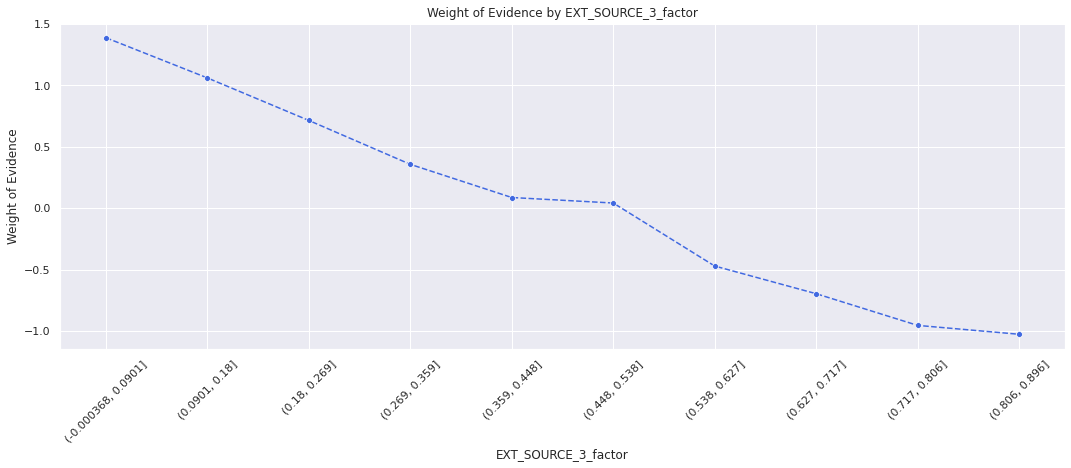

In [ ]:
plot_by_woe(es3, 45)

## Feature Encoding

In [ ]:
# This custom class will create new categorical dummy features based on the cut-off points based on the WoE and IV above.
# This class also allows a fit_transform method to be implemented on it and use it as part of a scikit-learn Pipeline 
class WoE_Binning(BaseEstimator, TransformerMixin):
    def __init__(self, X): # no *args or *kargs
        self.X = X
    def fit(self, X, y = None):
        return self #nothing else to do
    def transform(self, X):
        X_new = X.loc[:, 'CODE_GENDER:M'].to_frame()
        X_new['CODE_GENDER:F_XNA'] = sum([X['CODE_GENDER:F'], X['CODE_GENDER:XNA']])

        X_new['NAME_EDUCATION_TYPE:Academic degree'] = X.loc[:,'NAME_EDUCATION_TYPE:Academic degree']
        X_new['NAME_EDUCATION_TYPE:Higher education'] = X.loc[:,'NAME_EDUCATION_TYPE:Higher education']
        X_new['NAME_EDUCATION_TYPE:Incomplete higher'] = X.loc[:,'NAME_EDUCATION_TYPE:Incomplete higher']
        X_new['NAME_EDUCATION_TYPE:Lower secondary'] = X.loc[:,'NAME_EDUCATION_TYPE:Lower secondary']
        X_new['NAME_EDUCATION_TYPE:Secondary / secondary special'] = X.loc[:,'NAME_EDUCATION_TYPE:Secondary / secondary special']

        X_new['NAME_FAMILY_STATUS:Single_Unknown'] = X['NAME_FAMILY_STATUS:Single / not married'] | X['NAME_FAMILY_STATUS:Unknown']
        X_new['NAME_FAMILY_STATUS:Civil marriage'] = X.loc[:,'NAME_FAMILY_STATUS:Civil marriage']
        X_new['NAME_FAMILY_STATUS:Married'] = X.loc[:,'NAME_FAMILY_STATUS:Married']
        X_new['NAME_FAMILY_STATUS:Separated'] = X.loc[:,'NAME_FAMILY_STATUS:Separated']
        X_new['NAME_FAMILY_STATUS:Widow'] = X.loc[:,'NAME_FAMILY_STATUS:Widow']

        X_new['NAME_INCOME_TYPE:Business_comm'] = X['NAME_INCOME_TYPE:Businessman'] | X['NAME_INCOME_TYPE:Commercial associate']
        X_new['NAME_INCOME_TYPE:Pensioner_maternity'] = X['NAME_INCOME_TYPE:Pensioner'] | X['NAME_INCOME_TYPE:Maternity leave']
        X_new['NAME_INCOME_TYPE:student_unemployed'] = X['NAME_INCOME_TYPE:Student'] | X['NAME_INCOME_TYPE:Unemployed']
        X_new['NAME_INCOME_TYPE:State servant'] = X.loc[:,'NAME_INCOME_TYPE:State servant']
        X_new['NAME_INCOME_TYPE:Working'] = X.loc[:,'NAME_INCOME_TYPE:Working']

        # numerical
        X_new['REG_CITY_NOT_LIVE_CITY:0'] = np.where((X['REG_CITY_NOT_LIVE_CITY'] == 0), 1, 0)
        X_new['REG_CITY_NOT_LIVE_CITY:1'] = np.where((X['REG_CITY_NOT_LIVE_CITY'] == 1), 1, 0)

        X_new['FLAG_DOCUMENT_3:0'] = np.where((X['FLAG_DOCUMENT_3'] == 0), 1, 0)
        X_new['FLAG_DOCUMENT_3:1'] = np.where((X['FLAG_DOCUMENT_3'] == 1), 1, 0)

        X_new['REGION_RATING_CLIENT_W_CITY:0'] = np.where((X['REGION_RATING_CLIENT_W_CITY'] == 0), 1, 0)
        X_new['REGION_RATING_CLIENT_W_CITY:1'] = np.where((X['REGION_RATING_CLIENT_W_CITY'] == 1), 1, 0)
        X_new['REGION_RATING_CLIENT_W_CITY:2'] = np.where((X['REGION_RATING_CLIENT_W_CITY'] == 2), 1, 0)

        X_new['REGION_POPULATION_RELATIVE:<0.0147'] = np.where((X['REGION_POPULATION_RELATIVE'] <= 0.0147), 1, 0)
        X_new['REGION_POPULATION_RELATIVE:0.0147-0.0292'] = np.where((X['REGION_POPULATION_RELATIVE'] > 0.0147) & (X['REGION_POPULATION_RELATIVE'] <= 0.0292), 1, 0)
        X_new['REGION_POPULATION_RELATIVE:0.0292-0.0436'] = np.where((X['REGION_POPULATION_RELATIVE'] > 0.0292) & (X['REGION_POPULATION_RELATIVE'] <= 0.0436), 1, 0)
        X_new['REGION_POPULATION_RELATIVE:0.0436-0.0581'] = np.where((X['REGION_POPULATION_RELATIVE'] > 0.0436) & (X['REGION_POPULATION_RELATIVE'] <= 0.0581), 1, 0)
        X_new['REGION_POPULATION_RELATIVE:>0.0581'] = np.where((X['REGION_POPULATION_RELATIVE'] > 0.0581), 1, 0)

        X_new['YEAR_LAST_PHONE_CHANGE:<2'] = np.where((-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) <= 2), 1, 0)
        X_new['YEAR_LAST_PHONE_CHANGE:2-4'] = np.where((-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) > 2) & (-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) <= 4), 1, 0)
        X_new['YEAR_LAST_PHONE_CHANGE:4-6'] = np.where((-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) > 4) & (-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) <= 6), 1, 0)
        X_new['YEAR_LAST_PHONE_CHANGE:6-8'] = np.where((-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) > 6) & (-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) <= 8), 1, 0)
        X_new['YEAR_LAST_PHONE_CHANGE:8-10'] = np.where((-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) > 8) & (-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) <= 10), 1, 0)
        X_new['YEAR_LAST_PHONE_CHANGE:>10'] = np.where((-np.floor(X['DAYS_LAST_PHONE_CHANGE']/365) > 10), 1, 0)

        X_new['AMT_CREDIT:<846000'] = np.where((X['AMT_CREDIT'] <= 846000), 1, 0)
        X_new['AMT_CREDIT:846000-1647000'] = np.where((X['AMT_CREDIT'] > 846000) & (X['AMT_CREDIT'] <= 1647000), 1, 0)
        X_new['AMT_CREDIT:1647000-2448000'] = np.where((X['AMT_CREDIT'] > 1647000) & (X['AMT_CREDIT'] <= 2448000), 1, 0)
        X_new['AMT_CREDIT:2448000-3249000'] = np.where((X['AMT_CREDIT'] > 2448000) & (X['AMT_CREDIT'] <= 3249000), 1, 0)
        X_new['AMT_CREDIT:>3249000'] = np.where((X['AMT_CREDIT'] > 3249000), 1, 0)

        X_new['YEAR_ID_PUBLISH:<4'] = np.where((-np.floor(X['DAYS_ID_PUBLISH']/365) <= 4), 1, 0)
        X_new['YEAR_ID_PUBLISH:4-8'] = np.where((-np.floor(X['DAYS_ID_PUBLISH']/365) > 4) & (-np.floor(X['DAYS_ID_PUBLISH']/365) <= 8), 1, 0)
        X_new['YEAR_ID_PUBLISH:8-12'] = np.where((-np.floor(X['DAYS_ID_PUBLISH']/365) > 8) & (-np.floor(X['DAYS_ID_PUBLISH']/365) <= 12), 1, 0)
        X_new['YEAR_ID_PUBLISH:12-16'] = np.where((-np.floor(X['DAYS_ID_PUBLISH']/365) > 12) & (-np.floor(X['DAYS_ID_PUBLISH']/365) <= 16), 1, 0)
        X_new['YEAR_ID_PUBLISH:>16'] = np.where((-np.floor(X['DAYS_ID_PUBLISH']/365) > 16), 1, 0)

        X_new['YEAR_REGISTRATION:<17'] = np.where((-np.floor(X['DAYS_REGISTRATION']/365) <= 17), 1, 0)
        X_new['YEAR_REGISTRATION:17-34'] = np.where((-np.floor(X['DAYS_REGISTRATION']/365) > 17) & (-np.floor(X['DAYS_REGISTRATION']/365) <= 34), 1, 0)
        X_new['YEAR_REGISTRATION:34-51'] = np.where((-np.floor(X['DAYS_REGISTRATION']/365) > 34) & (-np.floor(X['DAYS_REGISTRATION']/365) <= 51), 1, 0)
        X_new['YEAR_REGISTRATION:>51'] = np.where((-np.floor(X['DAYS_REGISTRATION']/365) > 51), 1, 0)

        X_new['YEAR_BIRTH:<30'] = np.where((-np.floor(X['DAYS_BIRTH']/365) <= 30), 1, 0)
        X_new['YEAR_BIRTH:30-40'] = np.where((-np.floor(X['DAYS_BIRTH']/365) > 30) & (-np.floor(X['DAYS_BIRTH']/365) <= 40), 1, 0)
        X_new['YEAR_BIRTH:40-50'] = np.where((-np.floor(X['DAYS_BIRTH']/365) > 40) & (-np.floor(X['DAYS_BIRTH']/365) <= 50), 1, 0)
        X_new['YEAR_BIRTH:50-60'] = np.where((-np.floor(X['DAYS_BIRTH']/365) > 50) & (-np.floor(X['DAYS_BIRTH']/365) <= 60), 1, 0)
        X_new['YEAR_BIRTH:>60'] = np.where((-np.floor(X['DAYS_BIRTH']/365) > 60), 1, 0)

        X_new['EXT_SOURCE_2:<0.0855'] = np.where((X['EXT_SOURCE_2'] <= 0.0855), 1, 0)
        X_new['EXT_SOURCE_2:0.0855-0.171'] = np.where((X['EXT_SOURCE_2'] > 0.0855) & (X['EXT_SOURCE_2'] <= 0.171), 1, 0)
        X_new['EXT_SOURCE_2:0.171-0.256'] = np.where((X['EXT_SOURCE_2'] > 0.171) & (X['EXT_SOURCE_2'] <= 0.256), 1, 0)
        X_new['EXT_SOURCE_2:0.256-0.342'] = np.where((X['EXT_SOURCE_2'] > 0.256) & (X['EXT_SOURCE_2'] <= 0.342), 1, 0)
        X_new['EXT_SOURCE_2:0.342-0.427'] = np.where((X['EXT_SOURCE_2'] > 0.342) & (X['EXT_SOURCE_2'] <= 0.427), 1, 0)
        X_new['EXT_SOURCE_2:0.427-0.513'] = np.where((X['EXT_SOURCE_2'] > 0.427) & (X['EXT_SOURCE_2'] <= 0.513), 1, 0)
        X_new['EXT_SOURCE_2:0.513-0.598'] = np.where((X['EXT_SOURCE_2'] > 0.513) & (X['EXT_SOURCE_2'] <= 0.598), 1, 0)
        X_new['EXT_SOURCE_2:0.598-0.684'] = np.where((X['EXT_SOURCE_2'] > 0.598) & (X['EXT_SOURCE_2'] <= 0.684), 1, 0)
        X_new['EXT_SOURCE_2:0.684-0.769'] = np.where((X['EXT_SOURCE_2'] > 0.684) & (X['EXT_SOURCE_2'] <= 0.769), 1, 0)
        X_new['EXT_SOURCE_2:>0.769'] = np.where((X['EXT_SOURCE_2'] > 0.769), 1, 0)
        
        X_new['EXT_SOURCE_3:<0.0901'] = np.where((X['EXT_SOURCE_3'] <= 0.0901), 1, 0)
        X_new['EXT_SOURCE_3:0.0901-0.18'] = np.where((X['EXT_SOURCE_3'] > 0.0901) & (X['EXT_SOURCE_3'] <= 0.18), 1, 0)
        X_new['EXT_SOURCE_3:0.18-0.269'] = np.where((X['EXT_SOURCE_3'] > 0.18) & (X['EXT_SOURCE_3'] <= 0.269), 1, 0)
        X_new['EXT_SOURCE_3:0.269-0.359'] = np.where((X['EXT_SOURCE_3'] > 0.269) & (X['EXT_SOURCE_3'] <= 0.359), 1, 0)
        X_new['EXT_SOURCE_3:0.359-0.448'] = np.where((X['EXT_SOURCE_3'] > 0.359) & (X['EXT_SOURCE_3'] <= 0.448), 1, 0)
        X_new['EXT_SOURCE_3:0.448-0.538'] = np.where((X['EXT_SOURCE_3'] > 0.448) & (X['EXT_SOURCE_3'] <= 0.538), 1, 0)
        X_new['EXT_SOURCE_3:0.538-0.627'] = np.where((X['EXT_SOURCE_3'] > 0.538) & (X['EXT_SOURCE_3'] <= 0.627), 1, 0)
        X_new['EXT_SOURCE_3:0.627-0.717'] = np.where((X['EXT_SOURCE_3'] > 0.627) & (X['EXT_SOURCE_3'] <= 0.717), 1, 0)
        X_new['EXT_SOURCE_3:0.717-0.806'] = np.where((X['EXT_SOURCE_3'] > 0.717) & (X['EXT_SOURCE_3'] <= 0.806), 1, 0)
        X_new['EXT_SOURCE_3:>0.806'] = np.where((X['EXT_SOURCE_3'] > 0.806), 1, 0)

        return X_new

# Modeling

In [ ]:
# reconfirm shape of the 4 datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(246008, 44)
(246008,)
(61503, 44)
(61503,)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 246542 to 154255
Data columns (total 44 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   FLAG_OWN_CAR                                       246008 non-null  object 
 1   CODE_GENDER                                        246008 non-null  object 
 2   NAME_EDUCATION_TYPE                                246008 non-null  object 
 3   NAME_FAMILY_STATUS                                 246008 non-null  object 
 4   NAME_INCOME_TYPE                                   246008 non-null  object 
 5   EXT_SOURCE_2                                       246008 non-null  float64
 6   EXT_SOURCE_3                                       246008 non-null  float64
 7   DAYS_BIRTH                                         246008 non-null  float64
 8   REGION_RATING_CLIENT_W_CITY                        246008 non-null  f

## Random Forest

In [ ]:
# define modeling pipeline
rf = RandomForestClassifier(class_weight='balanced')
woe_transform = WoE_Binning(X)
pipeline = Pipeline(steps=[('woe', woe_transform), ('model', rf)])

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# fit and evaluate the model pipeline with cross-validation as defined in cv
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

Mean AUROC: 0.6578
Gini: 0.3155


## Decision Tree

In [ ]:
# define modeling pipeline
dt = DecisionTreeClassifier(class_weight='balanced')
woe_transform = WoE_Binning(X)
pipeline = Pipeline(steps=[('woe', woe_transform), ('model', dt)])

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# fit and evaluate the model pipeline with cross-validation as defined in cv
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

Mean AUROC: 0.5351
Gini: 0.0702


## Logistic Regression

In [ ]:
# define modeling pipeline
lr = LogisticRegression(class_weight='balanced')
woe_transform = WoE_Binning(X)
pipeline = Pipeline(steps=[('woe', woe_transform), ('model', lr)])

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# fit and evaluate the model pipeline with cross-validation as defined in cv
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

Mean AUROC: 0.7310
Gini: 0.4620


Based on the AUROC score, we will choose `logistic regression` model.

## Summary Table

In [ ]:
pipeline.fit(X_train, y_train)
print('success')

success


In [ ]:
# first create a transformed training set through our WoE_Binning custom class
X_train_woe_transformed = woe_transform.fit_transform(X_train)
# Store the column names in X_train as a list
feature_name = X_train_woe_transformed.columns.values
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(pipeline['model'].coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', pipeline['model'].intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)
summary_table

,Feature name,Coefficients
0,Intercept,0.014056
1,CODE_GENDER:M,-0.177838
2,CODE_GENDER:F_XNA,0.191594
3,NAME_EDUCATION_TYPE:Academic degree,1.091751
4,NAME_EDUCATION_TYPE:Higher education,0.047928
5,NAME_EDUCATION_TYPE:Incomplete higher,-0.168573
6,NAME_EDUCATION_TYPE:Lower secondary,-0.575159
7,NAME_EDUCATION_TYPE:Secondary / secondary special,-0.382191
8,NAME_FAMILY_STATUS:Single_Unknown,-0.040200
9,NAME_FAMILY_STATUS:Civil marriage,-0.069815


# Model Evaluation

In [ ]:
# make preditions on our test set
y_hat_test = pipeline.predict(X_test)
# get the predicted probabilities
y_hat_test_proba = pipeline.predict_proba(X_test)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# check the shape to make sure the number of rows is same as that in y_test
y_test_proba.shape

(61503, 2)

In [ ]:
# Rename the columns
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba
128081,1,0.677635
68695,1,0.429955
280602,1,0.603392
93006,1,0.418362
125876,1,0.443217


## Base Confusion Matrix

In [ ]:
# assign a threshold value to differentiate (base = 50% prob)
tr = 0.5
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimal threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
confusion_matrix(y_test_proba['y_test_class_actual'],
                 y_test_proba['y_test_class_predicted'],
                 normalize = 'all')

array([[0.05378599, 0.02694178],
       [0.29426207, 0.62501016]])

## AUROC Test

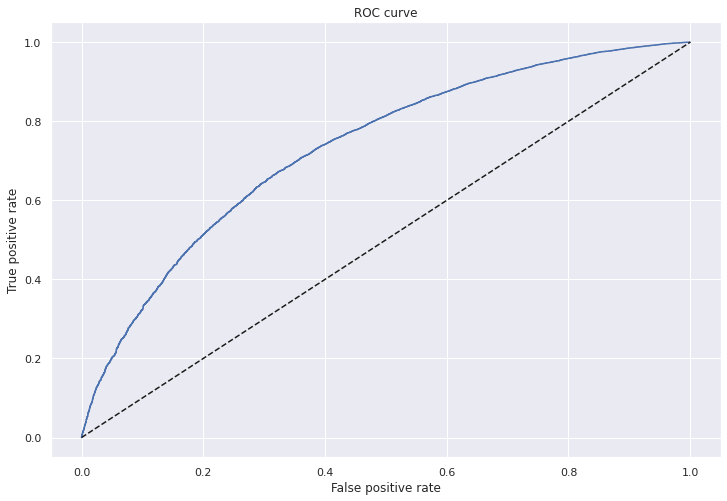

In [ ]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [ ]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) on our test set
auroc = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
auroc

0.7327998989138907

In [ ]:
# calculate Gini from AUROC
gini = auroc * 2 - 1
gini

0.4655997978277815

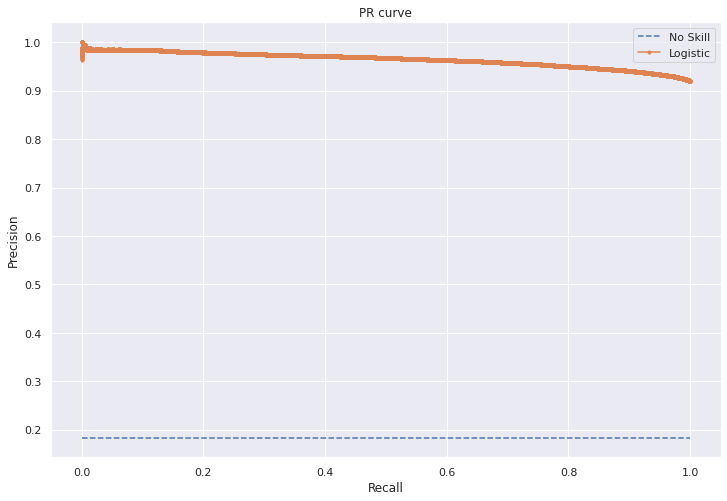

In [ ]:
# draw a PR curve
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.figure(figsize=(12,8))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], 
                                                       y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [ ]:
# calculate PR AUC
auc_pr = auc(recall, precision)
auc_pr

0.9642993638121323

## KS Statistics

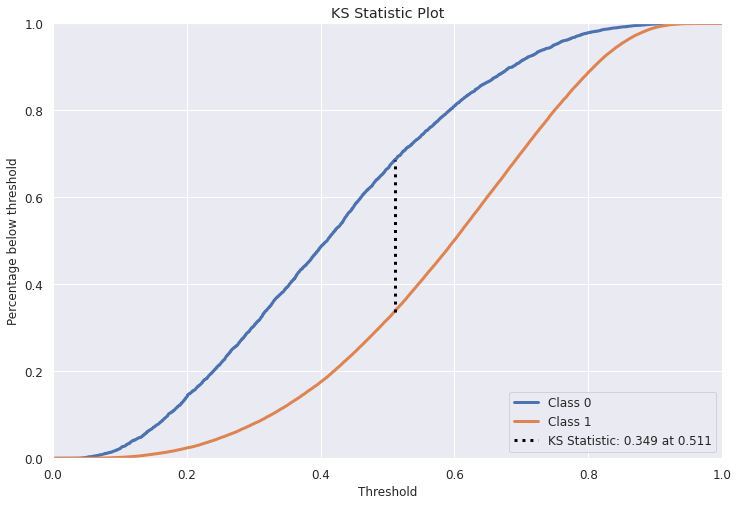

In [ ]:
y_pred_proba = pipeline.predict_proba(X_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(12,8));

KS Statistic or Kolmogorov-Smirnov statistic is the maximum difference between the positive and negative class distributions. It is often used as the deciding metric to judge the efficacy of models in credit scoring. The higher the KS, the more efficient is the model at capturing the responders.

Based on the KS plot above the classifier has a good gap between the class CDFs (Cumulative Distribution Function), so the model is considered as good performance.


# Creating Credit Scorecard

In [ ]:
df_scorecard = summary_table

In [ ]:
# create a new column, called 'Original feature name', which contains the value of the 'Feature name' column.
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final,specific feature
0,Intercept,0.014056,Intercept,559.660637,560.0,0.339363,560.0,Intercept
1,CODE_GENDER:M,-0.177838,CODE_GENDER,-9.693043,-10.0,-0.306957,-10.0,M
2,CODE_GENDER:F_XNA,0.191594,CODE_GENDER,10.442805,10.0,-0.442805,10.0,F_XNA
3,NAME_EDUCATION_TYPE:Academic degree,1.091751,NAME_EDUCATION_TYPE,59.505718,60.0,0.494282,60.0,Academic degree
4,NAME_EDUCATION_TYPE:Higher education,0.047928,NAME_EDUCATION_TYPE,2.612308,3.0,0.387692,3.0,Higher education
5,NAME_EDUCATION_TYPE:Incomplete higher,-0.168573,NAME_EDUCATION_TYPE,-9.188058,-9.0,0.188058,-9.0,Incomplete higher
6,NAME_EDUCATION_TYPE:Lower secondary,-0.575159,NAME_EDUCATION_TYPE,-31.348952,-31.0,0.348952,-31.0,Lower secondary
7,NAME_EDUCATION_TYPE:Secondary / secondary special,-0.382191,NAME_EDUCATION_TYPE,-20.831254,-21.0,-0.168746,-21.0,Secondary / secondary special
8,NAME_FAMILY_STATUS:Single_Unknown,-0.040200,NAME_FAMILY_STATUS,-2.191104,-2.0,0.191104,-2.0,Single_Unknown
9,NAME_FAMILY_STATUS:Civil marriage,-0.069815,NAME_FAMILY_STATUS,-3.805255,-4.0,-0.194745,-4.0,Civil marriage


## Define the Min and Max Score Using FICO score

A FICO score is a credit score created by the Fair Isaac Corporation (FICO). Lenders use borrowers’ FICO scores along with other details on borrowers’ credit reports to assess credit risk and determine whether to extend credit. Most credit scores have a 300-850 score range. The higher the score, the lower the risk to lenders.



In [ ]:
# Define the min and max threshholds for our scorecard
min_score = 300
max_score = 850

In [ ]:
# calculate the sum of the minimum coefficients of each category within the original feature name
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# calculate the sum of the maximum coefficients of each category within the original feature name
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# create a new columns that has the imputed calculated Score based on the multiplication of the coefficient 
# by the ratio of the differences between maximum & minimum score and maximum & minimum sum of cefficients.
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# update the calculated score of the Intercept (i.e. the default score for each loan)
df_scorecard.loc[0, 'Score - Calculation'] = (((df_scorecard.loc[0,'Coefficients'] - min_sum_coef) / 
                                              (max_sum_coef - min_sum_coef)) * 
                                              (max_score - min_score) + min_score)
# round the values of the 'Score - Calculation' column and store them in a new column
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final,specific feature
0,Intercept,0.014056,Intercept,559.660637,560.0,0.339363,560.0,Intercept
1,CODE_GENDER:M,-0.177838,CODE_GENDER,-9.693043,-10.0,-0.306957,-10.0,M
2,CODE_GENDER:F_XNA,0.191594,CODE_GENDER,10.442805,10.0,-0.442805,10.0,F_XNA
3,NAME_EDUCATION_TYPE:Academic degree,1.091751,NAME_EDUCATION_TYPE,59.505718,60.0,0.494282,60.0,Academic degree
4,NAME_EDUCATION_TYPE:Higher education,0.047928,NAME_EDUCATION_TYPE,2.612308,3.0,0.387692,3.0,Higher education
5,NAME_EDUCATION_TYPE:Incomplete higher,-0.168573,NAME_EDUCATION_TYPE,-9.188058,-9.0,0.188058,-9.0,Incomplete higher
6,NAME_EDUCATION_TYPE:Lower secondary,-0.575159,NAME_EDUCATION_TYPE,-31.348952,-31.0,0.348952,-31.0,Lower secondary
7,NAME_EDUCATION_TYPE:Secondary / secondary special,-0.382191,NAME_EDUCATION_TYPE,-20.831254,-21.0,-0.168746,-21.0,Secondary / secondary special
8,NAME_FAMILY_STATUS:Single_Unknown,-0.040200,NAME_FAMILY_STATUS,-2.191104,-2.0,0.191104,-2.0,Single_Unknown
9,NAME_FAMILY_STATUS:Civil marriage,-0.069815,NAME_FAMILY_STATUS,-3.805255,-4.0,-0.194745,-4.0,Civil marriage


In [ ]:
# check the min and max possible scores of our scorecard
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print(min_sum_score_prel)
print(max_sum_score_prel)

301.0
850.0


In [ ]:
pd.options.display.max_rows = 75
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard.sort_values(by = ['Score - Preliminary','Difference'])

,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final,specific feature
65,EXT_SOURCE_3:<0.0901,-1.237358,EXT_SOURCE_3,-67.442004,-67.0,0.442004,-68.0,<0.0901
55,EXT_SOURCE_2:<0.0855,-0.975986,EXT_SOURCE_2,-53.195992,-53.0,0.195992,-53.0,<0.0855
66,EXT_SOURCE_3:0.0901-0.18,-0.902166,EXT_SOURCE_3,-49.172452,-49.0,0.172452,-49.0,0.0901-0.18
15,NAME_INCOME_TYPE:student_unemployed,-0.741514,NAME_INCOME_TYPE,-40.416131,-40.0,0.416131,-40.0,student_unemployed
56,EXT_SOURCE_2:0.0855-0.171,-0.636812,EXT_SOURCE_2,-34.709353,-35.0,-0.290647,-35.0,0.0855-0.171
67,EXT_SOURCE_3:0.18-0.269,-0.605507,EXT_SOURCE_3,-33.003079,-33.0,0.003079,-33.0,0.18-0.269
6,NAME_EDUCATION_TYPE:Lower secondary,-0.575159,NAME_EDUCATION_TYPE,-31.348952,-31.0,0.348952,-31.0,Lower secondary
57,EXT_SOURCE_2:0.171-0.256,-0.446455,EXT_SOURCE_2,-24.333974,-24.0,0.333974,-24.0,0.171-0.256
7,NAME_EDUCATION_TYPE:Secondary / secondary special,-0.382191,NAME_EDUCATION_TYPE,-20.831254,-21.0,-0.168746,-21.0,Secondary / secondary special
68,EXT_SOURCE_3:0.269-0.359,-0.256437,EXT_SOURCE_3,-13.977052,-14.0,-0.022948,-14.0,0.269-0.359


In [ ]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard.loc[65, 'Score - Final'] = -68 # minus one on EXT_SOURCE_3:<0.0901
df_scorecard

,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final,specific feature
0,Intercept,0.014056,Intercept,559.660637,560.0,0.339363,560.0,Intercept
1,CODE_GENDER:M,-0.177838,CODE_GENDER,-9.693043,-10.0,-0.306957,-10.0,M
2,CODE_GENDER:F_XNA,0.191594,CODE_GENDER,10.442805,10.0,-0.442805,10.0,F_XNA
3,NAME_EDUCATION_TYPE:Academic degree,1.091751,NAME_EDUCATION_TYPE,59.505718,60.0,0.494282,60.0,Academic degree
4,NAME_EDUCATION_TYPE:Higher education,0.047928,NAME_EDUCATION_TYPE,2.612308,3.0,0.387692,3.0,Higher education
5,NAME_EDUCATION_TYPE:Incomplete higher,-0.168573,NAME_EDUCATION_TYPE,-9.188058,-9.0,0.188058,-9.0,Incomplete higher
6,NAME_EDUCATION_TYPE:Lower secondary,-0.575159,NAME_EDUCATION_TYPE,-31.348952,-31.0,0.348952,-31.0,Lower secondary
7,NAME_EDUCATION_TYPE:Secondary / secondary special,-0.382191,NAME_EDUCATION_TYPE,-20.831254,-21.0,-0.168746,-21.0,Secondary / secondary special
8,NAME_FAMILY_STATUS:Single_Unknown,-0.040200,NAME_FAMILY_STATUS,-2.191104,-2.0,0.191104,-2.0,Single_Unknown
9,NAME_FAMILY_STATUS:Civil marriage,-0.069815,NAME_FAMILY_STATUS,-3.805255,-4.0,-0.194745,-4.0,Civil marriage


In [ ]:
# check the min and max possible scores of our scorecard
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
print(min_sum_score_prel)
print(max_sum_score_prel)

300.0
850.0


## Calculating Credit Scores for Test Data

In [ ]:
# first create a transformed test set through our WoE_Binning custom class
X_test_woe_transformed = woe_transform.transform(X_test)
# insert an Intercept column in its beginning to align with the # of rows in scorecard
X_test_woe_transformed.insert(0, 'Intercept', 1)
X_test_woe_transformed.head()

,Intercept,CODE_GENDER:M,CODE_GENDER:F_XNA,NAME_EDUCATION_TYPE:Academic degree,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_FAMILY_STATUS:Single_Unknown,NAME_FAMILY_STATUS:Civil marriage,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:Separated,NAME_FAMILY_STATUS:Widow,NAME_INCOME_TYPE:Business_comm,NAME_INCOME_TYPE:Pensioner_maternity,NAME_INCOME_TYPE:student_unemployed,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Working,REG_CITY_NOT_LIVE_CITY:0,REG_CITY_NOT_LIVE_CITY:1,FLAG_DOCUMENT_3:0,FLAG_DOCUMENT_3:1,REGION_RATING_CLIENT_W_CITY:0,REGION_RATING_CLIENT_W_CITY:1,REGION_RATING_CLIENT_W_CITY:2,REGION_POPULATION_RELATIVE:<0.0147,REGION_POPULATION_RELATIVE:0.0147-0.0292,REGION_POPULATION_RELATIVE:0.0292-0.0436,REGION_POPULATION_RELATIVE:0.0436-0.0581,REGION_POPULATION_RELATIVE:>0.0581,YEAR_LAST_PHONE_CHANGE:<2,YEAR_LAST_PHONE_CHANGE:2-4,YEAR_LAST_PHONE_CHANGE:4-6,YEAR_LAST_PHONE_CHANGE:6-8,YEAR_LAST_PHONE_CHANGE:8-10,YEAR_LAST_PHONE_CHANGE:>10,AMT_CREDIT:<846000,AMT_CREDIT:846000-1647000,AMT_CREDIT:1647000-2448000,AMT_CREDIT:2448000-3249000,AMT_CREDIT:>3249000,YEAR_ID_PUBLISH:<4,YEAR_ID_PUBLISH:4-8,YEAR_ID_PUBLISH:8-12,YEAR_ID_PUBLISH:12-16,YEAR_ID_PUBLISH:>16,YEAR_REGISTRATION:<17,YEAR_REGISTRATION:17-34,YEAR_REGISTRATION:34-51,YEAR_REGISTRATION:>51,YEAR_BIRTH:<30,YEAR_BIRTH:30-40,YEAR_BIRTH:40-50,YEAR_BIRTH:50-60,YEAR_BIRTH:>60,EXT_SOURCE_2:<0.0855,EXT_SOURCE_2:0.0855-0.171,EXT_SOURCE_2:0.171-0.256,EXT_SOURCE_2:0.256-0.342,EXT_SOURCE_2:0.342-0.427,EXT_SOURCE_2:0.427-0.513,EXT_SOURCE_2:0.513-0.598,EXT_SOURCE_2:0.598-0.684,EXT_SOURCE_2:0.684-0.769,EXT_SOURCE_2:>0.769,EXT_SOURCE_3:<0.0901,EXT_SOURCE_3:0.0901-0.18,EXT_SOURCE_3:0.18-0.269,EXT_SOURCE_3:0.269-0.359,EXT_SOURCE_3:0.359-0.448,EXT_SOURCE_3:0.448-0.538,EXT_SOURCE_3:0.538-0.627,EXT_SOURCE_3:0.627-0.717,EXT_SOURCE_3:0.717-0.806,EXT_SOURCE_3:>0.806
128081,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
68695,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
280602,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
93006,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
125876,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# get the list of our final scorecard scores
scorecard_scores = df_scorecard['Score - Final'].to_frame().to_numpy()
# check the shapes of test set and scorecard before doing matrix dot multiplication
print(X_test_woe_transformed.shape)
print(scorecard_scores.shape)

(61503, 75)
(75, 1)


In [ ]:
# matrix dot multiplication of test set with scorecard scores
y_scores = X_test_woe_transformed.dot(scorecard_scores)
y_scores.head()

,0
128081,601.0
68695,544.0
280602,582.0
93006,541.0
125876,547.0


## Setting Loan Approval Cut-offs

In [ ]:
# Calculate Youden's J-Statistic to identify the best threshhold
J = tpr - fpr
# locate the index of the largest J
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold: %f' % (best_thresh))

Best Threshold: 0.296821


This means that based on the Youden's J statistic, the ideal probability threshold is 0.296821 which minimizes the FPR and maximimizes the TPR - all samples with a predicted probability higher than this should be classified as in Default and vice versa.

We can confirm this by looking at our original confusion matrix with the updated threshold

In [ ]:
tr = 0.5
# crate a new column for the predicted class based on predicted probabilities and threshold
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
print(classification_report(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted']))

              precision    recall  f1-score   support

           0       0.15      0.67      0.25      4965
           1       0.96      0.68      0.80     56538

    accuracy                           0.68     61503
   macro avg       0.56      0.67      0.52     61503
weighted avg       0.89      0.68      0.75     61503



In [ ]:
tr = best_thresh
# crate a new column for the predicted class based on predicted probabilities and threshold
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
print(classification_report(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted']))

              precision    recall  f1-score   support

           0       0.25      0.30      0.27      4965
           1       0.94      0.92      0.93     56538

    accuracy                           0.87     61503
   macro avg       0.60      0.61      0.60     61503
weighted avg       0.88      0.87      0.88     61503



In [ ]:
# create a new DF comprising of the thresholds from the ROC output
df_cutoffs = pd.DataFrame(thresholds, columns = ['thresholds'])
# calcue Score corresponding to each threshold
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * 
                       ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
df_cutoffs.head()

,thresholds,Score
0,0.037412,382.0
1,0.038461,383.0
2,0.040318,386.0
3,0.041077,387.0
4,0.043834,391.0


In [ ]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, for given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(y_test_proba['y_hat_test_proba'] >= p, 1, 0).sum()

In [ ]:
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['N Rejected'] = y_test_proba['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / y_test_proba['y_hat_test_proba'].shape[0]
# Rejection rate equals one minus approval rate.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
df_cutoffs.head()

,thresholds,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,0.037412,382.0,61503,0,1.000000,0.000000
1,0.038461,383.0,61502,1,0.999984,0.000016
2,0.040318,386.0,61501,2,0.999967,0.000033
3,0.041077,387.0,61500,3,0.999951,0.000049
4,0.043834,391.0,61499,4,0.999935,0.000065


In [ ]:
best_thresh

0.29682053904135647

In [ ]:
# let's have a look at the approval and rejection rates at our ideal threshold
df_cutoffs[df_cutoffs['thresholds'].between(0.296800, 0.296810)]

,thresholds,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5588,0.29681,512.0,55663,5840,0.905045,0.094955


Accordingly, we will stick with our ideal threshold and the corresponding Credit Score of 512, and will monitor the model's performance in production

## Final Result

In [ ]:
df_scorecard['Specific Feature'] = df_scorecard['Feature name'].apply(lambda x: x.split(":")[1] if x != 'Intercept' else 'Intercept')

In [ ]:
df_scorecard[['Original feature name', 'Specific Feature', 'Score - Final']]

,Original feature name,Specific Feature,Score - Final
0,Intercept,Intercept,560.0
1,CODE_GENDER,M,-10.0
2,CODE_GENDER,F_XNA,10.0
3,NAME_EDUCATION_TYPE,Academic degree,60.0
4,NAME_EDUCATION_TYPE,Higher education,3.0
5,NAME_EDUCATION_TYPE,Incomplete higher,-9.0
6,NAME_EDUCATION_TYPE,Lower secondary,-31.0
7,NAME_EDUCATION_TYPE,Secondary / secondary special,-21.0
8,NAME_FAMILY_STATUS,Single_Unknown,-2.0
9,NAME_FAMILY_STATUS,Civil marriage,-4.0
